<a href="https://colab.research.google.com/github/graceo246/Final-Year-project-dissertation/blob/main/dissertation_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive")
!pwd

/content/drive/MyDrive


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import shap



# 2024

In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2024_Q1.xlsx"



sheet_columns = {

                 "A2P": ["Region Code", "Location", "Total owed a prevention duty1", "Total end of AST",
             "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
             "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
             "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
             "Total Landlord wishing to sell or re-let the property (P)", "sell the property (P)",
             "re-let the property (P)", "Retired 'Landlord wishing to' option (P)",
             "Tenant complained to the council / agent / landlord about disrepair (P)",
             "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
             "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
             "Non-violent relationship breakdown with partner (P)", "Total Domestic abuse (P)",
             "Victim (P)", "Alleged perpetrator (P)", "Retired 'Domestic abuse' option (P)",
             "Other violence or harrassment (P)", "Total end of social rented tenancy (P)", "Rent arrears2 (P)",
             "Breach of tenancy, not related to rent arrears (P)", "Other reasons / not known3 (P)",
             "Total evicted from supported housing (P)", "Rent arrears (P)",
             "Breach of tenancy or licence, not related to rent arrears (P)", "Other reasons / not known4 (P)",
             "Total Departure from institution (P)", "Custody (P)", "Hospital (psychiatric) (P)",
             "Hospital (general) (P)", "Looked After Child Placement (P)", "Retired 'Left institution' option (P)",
             "Required to leave accommodation provided by Home Office as asylum support (P)",
             "Home no longer suitable - disability / ill health 5 (P)", "Other reasons / not known (P)"],

             "A2R": ["Region Code", "Location", "Total owed a relief duty1", "End of assured shorthold (AST) private rented tenancy, due to..",
             "Tenant difficulty budgeting or making other payment(s)", "Increase in rent", "Reduction in employment income",
             "Changes in benefit entitlement", "Change in personal circumstances", "Breach of tenancy, not related to rent arrears",
             "Total Landlord wishing to sell or re-let the property", "sell the property", "re-let the property",
             "Retired 'Landlord wishing to' option", "Tenant complained to the council / agent / landlord about disrepair",
             "Illegal eviction", "Tenant abandoned property", "Other reasons / not known", "End of non-AST private rented tenancy",
             "Family or friends no longer willing or able to accommodate", "Non-violent relationship breakdown with partner",
             "Total Domestic abuse", "Victim", "Alleged perpetrator", "Retired 'Domestic abuse' option", "Other violence or harrassment",
             "Total end of social rented tenancy", "Rent arrears2", "Breach of tenancy, not related to rent arrears",
             "Other reasons / not known3", "Total evicted from supported housing", "Rent arrears",
             "Breach of tenancy or licence, not related to rent arrears", "Other reasons / not known4", "Total Departure from institution",
             "Custody", "Hospital (psychiatric)", "Hospital (general)", "Looked After Child Placement", "Retired 'Left institution' option",
             "Required to leave accommodation provided by Home Office as asylum support", "Home no longer suitable - disability / ill health 5",
             "Other reasons / not known 7"],
    "A3": ["Region Code", "Location", "Households with no support needs owed duty1,2", "Households with unknown support needs owed duty",
            "Households with one or more support needs owed duty1,2", "One", "Two", "Three", "Total number of support needs1",
            "Young person aged 16-17 years", "Young person aged 18-25 years requiring support to manage independently",
            "Young parent requiring support to manage independently", "Care leaver aged 18-20 years", "Care leaver aged 21-24 3",
            "Care leaver aged 25+ 4", "Care leaver - retired option 5", "Physical ill health and disability",
            "History of mental health problems", "Learning disability", "At risk of / has experienced sexual abuse / exploitation",
            "At risk of / has experienced domestic abuse", "At risk of / has experienced abuse (non-domestic abuse)",
            "Drug dependency needs", "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
            "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
            "Access to education, employment or training", "Victim of modern slavery", "Difficulties budgeting"],

    "A5P": ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R": ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A10": ["Region Code", "Location", "Total owed a prevention or relief duty1",
        "Full-time work", "Part-time work", "Student / training", "Registered unemployed",
        "Not registered but seeking work", "Not seeking work / at home",
        "Not working due to long-term illness / disability", "Retired",
        "Total Registered employed off work", "Due to ill health / disability 3",
        "On maternity/paternity / adoption leave 4", "Working irregular hours 5",
        "Other", "Not known4"],

    "A12": [
        "Region Code",
        "Location",
        "Total owed a prevention or relief duty1,2",
        "Heterosexual / Straight",
        "Homosexual (Gay/Lesbian)",
        "Bisexual",
        "Other2",
        "Prefer not to say",
        "Not known5"
    ],
    "P1": ["Region Code", "Location", "Total number of households where prevention duty ended1,2", "Total secured accommodation", "Stayed in existing accommodation",
            "Moved to alternative accommodation", "Homeless (including intentionally homeless)", "Refused suitable accommodation offer","Refused to cooperate","Contact lost (P)","Total withdrew /  deceased(P)",
           "Withdrew application(P)","Applicant deceased(P)","Retired 'withdrew/ deceased' option(P)","56 days elapsed and no further action","No longer eligible(P)", "Not known6"],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1": [
        "Region Code",
        "Location",
        "Total number of households where relief duty ended1,2",
        "Secured accommodation for 6+ months",
        "56 days elapsed",
        "Local connection referral accepted by other LA",
        "Intentionally homeless from accommodation provided",
        "Refused final accommodation",
        "Notice served due to refusal to cooperate",
        "Contact lost",
        "Total withdrew / deceased",
        "Withdrew application",
        "Applicant deceased",
        "Retired 'withdrew/deceased' option",
        "No longer eligible",
        "Not known4"
    ],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')



    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q1_2024.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved with ")

In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2024_Q2.xlsx"


 sheet_columns = {

                          "A2P" : [
                "Region Code", "Location", "Total owed a prevention duty (P)", "Total end of AST (P)",
                "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
                "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
                "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
                "Landlord wishing to sell or re-let the property (P)",
                "Tenant complained to the council / agent / landlord about disrepair (P)",
                "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
                "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
                "Non-violent relationship breakdown with partner (P)", "Domestic abuse (P)",
                "Other violence or harassment (P)", "Total end of social rented tenancy (P)",
                "Rent arrears2 (P)", "Breach of tenancy, not related to rent arrears (P)",
                "Other reasons / not known3 (P)", "Total evicted from supported housing (P)",
                "Rent arrears (P)", "Breach of tenancy or licence, not related to rent arrears (P)",
                "Other reasons / not known4 (P)", "Left institution with no accommodation available (P)",
                "Required to leave accommodation provided by Home Office as asylum support (P)",
                "Other reasons / not known5 (P)"
            ],

             "A2R": ["Region Code", "Location", "Total owed a relief duty1", "End of assured shorthold (AST) private rented tenancy, due to..",
             "Tenant difficulty budgeting or making other payment(s)", "Increase in rent", "Reduction in employment income",
             "Changes in benefit entitlement", "Change in personal circumstances", "Breach of tenancy, not related to rent arrears",
             "Total Landlord wishing to sell or re-let the property", "sell the property", "re-let the property",
             "Retired 'Landlord wishing to' option", "Tenant complained to the council / agent / landlord about disrepair",
             "Illegal eviction", "Tenant abandoned property", "Other reasons / not known", "End of non-AST private rented tenancy",
             "Family or friends no longer willing or able to accommodate", "Non-violent relationship breakdown with partner",
             "Total Domestic abuse", "Victim", "Alleged perpetrator", "Retired 'Domestic abuse' option", "Other violence or harrassment",
             "Total end of social rented tenancy", "Rent arrears2", "Breach of tenancy, not related to rent arrears",
             "Other reasons / not known3", "Total evicted from supported housing", "Rent arrears",
             "Breach of tenancy or licence, not related to rent arrears", "Other reasons / not known4", "Total Departure from institution",
             "Custody", "Hospital (psychiatric)", "Hospital (general)", "Looked After Child Placement", "Retired 'Left institution' option",
             "Required to leave accommodation provided by Home Office as asylum support", "Home no longer suitable - disability / ill health 5",
             "Other reasons / not known 7"],
    "A3": ["Region Code", "Location", "Households with no support needs owed duty1,2", "Households with unknown support needs owed duty",
            "Households with one or more support needs owed duty1,2", "One", "Two", "Three", "Total number of support needs1",
            "Young person aged 16-17 years", "Young person aged 18-25 years requiring support to manage independently",
            "Young parent requiring support to manage independently", "Care leaver aged 18-20 years", "Care leaver aged 21-24 3",
            "Care leaver aged 25+ 4", "Care leaver - retired option 5", "Physical ill health and disability",
            "History of mental health problems", "Learning disability", "At risk of / has experienced sexual abuse / exploitation",
            "At risk of / has experienced domestic abuse", "At risk of / has experienced abuse (non-domestic abuse)",
            "Drug dependency needs", "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
            "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
            "Access to education, employment or training", "Victim of modern slavery", "Difficulties budgeting"],

    "A5P": ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R": ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A10": ["Region Code", "Location", "Total owed a prevention or relief duty1",
        "Full-time work", "Part-time work", "Student / training", "Registered unemployed",
        "Not registered but seeking work", "Not seeking work / at home",
        "Not working due to long-term illness / disability", "Retired",
        "Total Registered employed off work", "Due to ill health / disability 3",
        "On maternity/paternity / adoption leave 4", "Working irregular hours 5",
        "Other", "Not known4"],

    "A12": [
        "Region Code",
        "Location",
        "Total owed a prevention or relief duty1,2",
        "Heterosexual / Straight",
        "Homosexual (Gay/Lesbian)",
        "Bisexual",
        "Other2",
        "Prefer not to say",
        "Not known5"
    ],
    "P1": ["Region Code", "Location", "Total number of households where prevention duty ended1,2", "Total secured accommodation", "Stayed in existing accommodation",
            "Moved to alternative accommodation", "Homeless (including intentionally homeless)", "Refused suitable accommodation offer","Refused to cooperate","Contact lost (P)","Total withdrew /  deceased(P)",
           "Withdrew application(P)","Applicant deceased(P)","Retired 'withdrew/ deceased' option(P)","56 days elapsed and no further action","No longer eligible(P)", "Not known6"],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1": [
        "Region Code",
        "Location",
        "Total number of households where relief duty ended1,2",
        "Secured accommodation for 6+ months",
        "56 days elapsed",
        "Local connection referral accepted by other LA",
        "Intentionally homeless from accommodation provided",
        "Refused final accommodation",
        "Notice served due to refusal to cooperate",
        "Contact lost",
        "Total withdrew / deceased",
        "Withdrew application",
        "Applicant deceased",
        "Retired 'withdrew/deceased' option",
        "No longer eligible",
        "Not known4"
    ],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')




    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q2_2024.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved")

In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2024_Q3.xlsx"



sheet_columns = {

                 "A2P": ["Region Code", "Location", "Total owed a prevention duty1", "Total end of AST",
             "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
             "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
             "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
             "Total Landlord wishing to sell or re-let the property (P)", "sell the property (P)",
             "re-let the property (P)", "Retired 'Landlord wishing to' option (P)",
             "Tenant complained to the council / agent / landlord about disrepair (P)",
             "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
             "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
             "Non-violent relationship breakdown with partner (P)", "Total Domestic abuse (P)",
             "Victim (P)", "Alleged perpetrator (P)", "Retired 'Domestic abuse' option (P)",
             "Other violence or harrassment (P)", "Total end of social rented tenancy (P)", "Rent arrears2 (P)",
             "Breach of tenancy, not related to rent arrears (P)", "Other reasons / not known3 (P)",
             "Total evicted from supported housing (P)", "Rent arrears (P)",
             "Breach of tenancy or licence, not related to rent arrears (P)", "Other reasons / not known4 (P)",
             "Total Departure from institution (P)", "Custody (P)", "Hospital (psychiatric) (P)",
             "Hospital (general) (P)", "Looked After Child Placement (P)", "Retired 'Left institution' option (P)",
             "Required to leave accommodation provided by Home Office as asylum support (P)", "Loss of placement or sponsorship provided through a resettlement scheme 6 (P)",
             "Home no longer suitable - disability / ill health 5 (P)", "Other reasons / not known (P)"],

             "A2R": ["Region Code", "Location", "Total owed a relief duty1", "End of assured shorthold (AST) private rented tenancy, due to..",
             "Tenant difficulty budgeting or making other payment(s)", "Increase in rent", "Reduction in employment income",
             "Changes in benefit entitlement", "Change in personal circumstances", "Breach of tenancy, not related to rent arrears",
             "Total Landlord wishing to sell or re-let the property", "sell the property", "re-let the property",
             "Retired 'Landlord wishing to' option", "Tenant complained to the council / agent / landlord about disrepair",
             "Illegal eviction", "Tenant abandoned property", "Other reasons / not known", "End of non-AST private rented tenancy",
             "Family or friends no longer willing or able to accommodate", "Non-violent relationship breakdown with partner",
             "Total Domestic abuse", "Victim", "Alleged perpetrator", "Retired 'Domestic abuse' option", "Other violence or harrassment",
             "Total end of social rented tenancy", "Rent arrears2", "Breach of tenancy, not related to rent arrears",
             "Other reasons / not known3", "Total evicted from supported housing", "Rent arrears",
             "Breach of tenancy or licence, not related to rent arrears", "Other reasons / not known4", "Total Departure from institution",
             "Custody", "Hospital (psychiatric)", "Hospital (general)", "Looked After Child Placement", "Retired 'Left institution' option",
             "Required to leave accommodation provided by Home Office as asylum support", "Home no longer suitable - disability / ill health 5", "Loss of placement or sponsorship provided through a resettlement scheme 6",
             "Other reasons / not known 7"],
    "A3": ["Region Code", "Location", "Households with no support needs owed duty1,2", "Households with unknown support needs owed duty",
            "Households with one or more support needs owed duty1,2", "One", "Two", "Three", "Total number of support needs1",
            "Young person aged 16-17 years", "Young person aged 18-25 years requiring support to manage independently",
            "Young parent requiring support to manage independently", "Care leaver aged 18-20 years", "Care leaver aged 21-24 3",
            "Care leaver aged 25+ 4", "Care leaver - retired option 5", "Physical ill health and disability",
            "History of mental health problems", "Learning disability", "At risk of / has experienced sexual abuse / exploitation",
            "At risk of / has experienced domestic abuse", "At risk of / has experienced abuse (non-domestic abuse)",
            "Drug dependency needs", "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
            "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
            "Access to education, employment or training", "Victim of modern slavery", "Difficulties budgeting"],

    "A5P": ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R": ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A10": ["Region Code", "Location", "Total owed a prevention or relief duty1",
        "Full-time work", "Part-time work", "Student / training", "Registered unemployed",
        "Not registered but seeking work", "Not seeking work / at home",
        "Not working due to long-term illness / disability", "Retired",
        "Total Registered employed off work", "Due to ill health / disability 3",
        "On maternity/paternity / adoption leave 4", "Working irregular hours 5",
        "Other", "Not known4"],

    "A12": [
        "Region Code",
        "Location",
        "Total owed a prevention or relief duty1,2",
        "Heterosexual / Straight",
        "Homosexual (Gay/Lesbian)",
        "Bisexual",
        "Other2",
        "Prefer not to say",
        "Not known5"
    ],
    "P1": ["Region Code", "Location", "Total number of households where prevention duty ended1,2", "Total secured accommodation", "Stayed in existing accommodation",
            "Moved to alternative accommodation", "Homeless (including intentionally homeless)", "Refused suitable accommodation offer","Refused to cooperate","Contact lost (P)","Total withdrew /  deceased(P)",
           "Withdrew application(P)","Applicant deceased(P)","Retired 'withdrew/ deceased' option(P)","56 days elapsed and no further action","No longer eligible(P)", "Not known6"],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1": [
        "Region Code",
        "Location",
        "Total number of households where relief duty ended1,2",
        "Secured accommodation for 6+ months",
        "56 days elapsed",
        "Local connection referral accepted by other LA",
        "Intentionally homeless from accommodation provided",
        "Refused final accommodation",
        "Notice served due to refusal to cooperate",
        "Contact lost",
        "Total withdrew / deceased",
        "Withdrew application",
        "Applicant deceased",
        "Retired 'withdrew/deceased' option",
        "No longer eligible",
        "Not known4"
    ],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')




    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q3_2024.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved ")


ADD columns

# 2024 Merging

In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q1_2024.xlsx"


sheets = [ "A2P", "A2R", "A3","A5P", "A5R", "A6", "A8", "A10","A12", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2024
    temp_df['Quarter'] = 1
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q1_2024_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")


<ipython-input-17-cf5f90df01f1>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-17-cf5f90df01f1>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q1_2024_Merged.xlsx


In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/Q1_2024.xlsx"


sheets = [ "A2P", "A2R", "A3","A5P", "A5R", "A6", "A8", "A10","A12", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2024
    temp_df['Quarter'] = 2
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q2_2024_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")


<ipython-input-18-96031161a665>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-18-96031161a665>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q2_2024_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q3_2024.xlsx"


sheets = [ "A2P", "A2R", "A3","A5P", "A5R", "A6", "A8", "A10","A12", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2024
    temp_df['Quarter'] = 3

    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q3_2024_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")


<ipython-input-19-d6e9fae1681b>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-19-d6e9fae1681b>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q3_2024_Merged.xlsx


In [ ]:
import pandas as pd

# Load datasets
Q1_2024merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q1_2024_Merged.xlsx")
Q2_2024merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q2_2024_Merged.xlsx")
Q3_2024merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q3_2024_Merged.xlsx")


merged_df2024 = pd.concat([Q1_2024merge, Q2_2024merge, Q3_2024merge], ignore_index=True)


merged_df2024 = merged_df2024.drop_duplicates()


output_path = "/content/drive/MyDrive/FYP Datasets/Final2024_Merged.xlsx"
merged_df2024.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")


Merged file saved as /content/drive/MyDrive/FYP Datasets/Final2024_Merged.xlsx


# 2023

In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2023_Q1.xlsx"



sheet_columns = {

             "A2P" : [
    "Region Code", "Location", "Total owed a prevention duty (P)", "Total end of AST (P)",
    "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
    "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
    "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Landlord wishing to sell or re-let the property (P)",
    "Tenant complained to the council / agent / landlord about disrepair (P)",
    "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
    "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
    "Non-violent relationship breakdown with partner (P)", "Domestic abuse (P)",
    "Other violence or harassment (P)", "Total end of social rented tenancy (P)",
    "Rent arrears2 (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Other reasons / not known3 (P)", "Total evicted from supported housing (P)",
    "Rent arrears (P)", "Breach of tenancy or licence, not related to rent arrears (P)",
    "Other reasons / not known4 (P)", "Left institution with no accommodation available (P)",
    "Required to leave accommodation provided by Home Office as asylum support (P)",
    "Other reasons / not known5 (P)"
],

             "A2R": [
    "Region Code",
    "Location",
    "Total owed a relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],

    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O" : [
    "Region Code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

    "A12" : [
    "Region Code", "Location", "Total owed a prevention or relief duty1,2", "Heterosexual / Straight",
    "Homosexual (Gay/Lesbian)", "Other", "Prefer not to say", "Not known"
],
    "P1" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')




    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q1_2023.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved")

In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2023_Q2.xlsx"



sheet_columns = {

             "A2P" : [
    "Region Code", "Location", "Total owed a prevention duty (P)", "Total end of AST (P)",
    "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
    "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
    "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Landlord wishing to sell or re-let the property (P)",
    "Tenant complained to the council / agent / landlord about disrepair (P)",
    "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
    "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
    "Non-violent relationship breakdown with partner (P)", "Domestic abuse (P)",
    "Other violence or harassment (P)", "Total end of social rented tenancy (P)",
    "Rent arrears2 (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Other reasons / not known3 (P)", "Total evicted from supported housing (P)",
    "Rent arrears (P)", "Breach of tenancy or licence, not related to rent arrears (P)",
    "Other reasons / not known4 (P)", "Left institution with no accommodation available (P)",
    "Required to leave accommodation provided by Home Office as asylum support (P)",
    "Other reasons / not known5 (P)"
],

             "A2R": [
    "Region Code",
    "Location",
    "Total owed a relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],

    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O" : [
    "Region Code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

    "A12" : [
    "Region Code", "Location", "Total owed a prevention or relief duty1,2", "Heterosexual / Straight",
    "Homosexual (Gay/Lesbian)", "Other", "Prefer not to say", "Not known"
],
    "P1" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')



    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q2_2023.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved")


In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2023_Q3.xlsx"



sheet_columns = {

                 "A2P": ["Region Code", "Location", "Total owed a prevention duty1", "Total end of AST",
             "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
             "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
             "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
             "Total Landlord wishing to sell or re-let the property (P)", "sell the property (P)",
             "re-let the property (P)", "Retired 'Landlord wishing to' option (P)",
             "Tenant complained to the council / agent / landlord about disrepair (P)",
             "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
             "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
             "Non-violent relationship breakdown with partner (P)", "Total Domestic abuse (P)",
             "Victim (P)", "Alleged perpetrator (P)", "Retired 'Domestic abuse' option (P)",
             "Other violence or harrassment (P)", "Total end of social rented tenancy (P)", "Rent arrears2 (P)",
             "Breach of tenancy, not related to rent arrears (P)", "Other reasons / not known3 (P)",
             "Total evicted from supported housing (P)", "Rent arrears (P)",
             "Breach of tenancy or licence, not related to rent arrears (P)", "Other reasons / not known4 (P)",
             "Total Departure from institution (P)", "Custody (P)", "Hospital (psychiatric) (P)",
             "Hospital (general) (P)", "Looked After Child Placement (P)", "Retired 'Left institution' option (P)",
             "Required to leave accommodation provided by Home Office as asylum support (P)",
             "Home no longer suitable - disability / ill health 5 (P)", "Other reasons / not known (P)"],

             "A2R": ["Region Code", "Location", "Total owed a relief duty1", "End of assured shorthold (AST) private rented tenancy, due to..",
             "Tenant difficulty budgeting or making other payment(s)", "Increase in rent", "Reduction in employment income",
             "Changes in benefit entitlement", "Change in personal circumstances", "Breach of tenancy, not related to rent arrears",
             "Total Landlord wishing to sell or re-let the property", "sell the property", "re-let the property",
             "Retired 'Landlord wishing to' option", "Tenant complained to the council / agent / landlord about disrepair",
             "Illegal eviction", "Tenant abandoned property", "Other reasons / not known", "End of non-AST private rented tenancy",
             "Family or friends no longer willing or able to accommodate", "Non-violent relationship breakdown with partner",
             "Total Domestic abuse", "Victim", "Alleged perpetrator", "Retired 'Domestic abuse' option", "Other violence or harrassment",
             "Total end of social rented tenancy", "Rent arrears2", "Breach of tenancy, not related to rent arrears",
             "Other reasons / not known3", "Total evicted from supported housing", "Rent arrears",
             "Breach of tenancy or licence, not related to rent arrears", "Other reasons / not known4", "Total Departure from institution",
             "Custody", "Hospital (psychiatric)", "Hospital (general)", "Looked After Child Placement", "Retired 'Left institution' option",
             "Required to leave accommodation provided by Home Office as asylum support", "Home no longer suitable - disability / ill health 5",
             "Other reasons / not known 7"],
    "A3": ["Region Code", "Location", "Households with no support needs owed duty1,2", "Households with unknown support needs owed duty",
            "Households with one or more support needs owed duty1,2", "One", "Two", "Three", "Total number of support needs1",
            "Young person aged 16-17 years", "Young person aged 18-25 years requiring support to manage independently",
            "Young parent requiring support to manage independently", "Care leaver aged 18-20 years", "Care leaver aged 21-24 3",
            "Care leaver aged 25+ 4", "Care leaver - retired option 5", "Physical ill health and disability",
            "History of mental health problems", "Learning disability", "At risk of / has experienced sexual abuse / exploitation",
            "At risk of / has experienced domestic abuse", "At risk of / has experienced abuse (non-domestic abuse)",
            "Drug dependency needs", "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
            "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
            "Access to education, employment or training", "Victim of modern slavery", "Difficulties budgeting"],

    "A5P": ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R": ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A10": ["Region Code", "Location", "Total owed a prevention or relief duty1",
        "Full-time work", "Part-time work", "Student / training", "Registered unemployed",
        "Not registered but seeking work", "Not seeking work / at home",
        "Not working due to long-term illness / disability", "Retired",
        "Total Registered employed off work", "Due to ill health / disability 3",
        "On maternity/paternity / adoption leave 4", "Working irregular hours 5",
        "Other", "Not known4"],

    "A12": [
        "Region Code",
        "Location",
        "Total owed a prevention or relief duty1,2",
        "Heterosexual / Straight",
        "Homosexual (Gay/Lesbian)",
        "Bisexual",
        "Other2",
        "Prefer not to say",
        "Not known5"
    ],
    "P1": ["Region Code", "Location", "Total number of households where prevention duty ended1,2", "Total secured accommodation", "Stayed in existing accommodation",
            "Moved to alternative accommodation", "Homeless (including intentionally homeless)", "Refused suitable accommodation offer","Refused to cooperate","Contact lost (P)","Total withdrew /  deceased(P)",
           "Withdrew application(P)","Applicant deceased(P)","Retired 'withdrew/ deceased' option(P)","56 days elapsed and no further action","No longer eligible(P)", "Not known6"],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1": [
        "Region Code",
        "Location",
        "Total number of households where relief duty ended1,2",
        "Secured accommodation for 6+ months",
        "56 days elapsed",
        "Local connection referral accepted by other LA",
        "Intentionally homeless from accommodation provided",
        "Refused final accommodation",
        "Notice served due to refusal to cooperate",
        "Contact lost",
        "Total withdrew / deceased",
        "Withdrew application",
        "Applicant deceased",
        "Retired 'withdrew/deceased' option",
        "No longer eligible",
        "Not known4"
    ],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')




    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q3_2023.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved ")


In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2023_Q4.xlsx"



sheet_columns = {

                 "A2P": ["Region Code", "Location", "Total owed a prevention duty1", "Total end of AST",
             "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
             "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
             "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
             "Total Landlord wishing to sell or re-let the property (P)", "sell the property (P)",
             "re-let the property (P)", "Retired 'Landlord wishing to' option (P)",
             "Tenant complained to the council / agent / landlord about disrepair (P)",
             "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
             "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
             "Non-violent relationship breakdown with partner (P)", "Total Domestic abuse (P)",
             "Victim (P)", "Alleged perpetrator (P)", "Retired 'Domestic abuse' option (P)",
             "Other violence or harrassment (P)", "Total end of social rented tenancy (P)", "Rent arrears2 (P)",
             "Breach of tenancy, not related to rent arrears (P)", "Other reasons / not known3 (P)",
             "Total evicted from supported housing (P)", "Rent arrears (P)",
             "Breach of tenancy or licence, not related to rent arrears (P)", "Other reasons / not known4 (P)",
             "Total Departure from institution (P)", "Custody (P)", "Hospital (psychiatric) (P)",
             "Hospital (general) (P)", "Looked After Child Placement (P)", "Retired 'Left institution' option (P)",
             "Required to leave accommodation provided by Home Office as asylum support (P)",
             "Home no longer suitable - disability / ill health 5 (P)", "Other reasons / not known (P)"],

             "A2R": ["Region Code", "Location", "Total owed a relief duty1", "End of assured shorthold (AST) private rented tenancy, due to..",
             "Tenant difficulty budgeting or making other payment(s)", "Increase in rent", "Reduction in employment income",
             "Changes in benefit entitlement", "Change in personal circumstances", "Breach of tenancy, not related to rent arrears",
             "Total Landlord wishing to sell or re-let the property", "sell the property", "re-let the property",
             "Retired 'Landlord wishing to' option", "Tenant complained to the council / agent / landlord about disrepair",
             "Illegal eviction", "Tenant abandoned property", "Other reasons / not known", "End of non-AST private rented tenancy",
             "Family or friends no longer willing or able to accommodate", "Non-violent relationship breakdown with partner",
             "Total Domestic abuse", "Victim", "Alleged perpetrator", "Retired 'Domestic abuse' option", "Other violence or harrassment",
             "Total end of social rented tenancy", "Rent arrears2", "Breach of tenancy, not related to rent arrears",
             "Other reasons / not known3", "Total evicted from supported housing", "Rent arrears",
             "Breach of tenancy or licence, not related to rent arrears", "Other reasons / not known4", "Total Departure from institution",
             "Custody", "Hospital (psychiatric)", "Hospital (general)", "Looked After Child Placement", "Retired 'Left institution' option",
             "Required to leave accommodation provided by Home Office as asylum support", "Home no longer suitable - disability / ill health 5",
             "Other reasons / not known 7"],
    "A3": ["Region Code", "Location", "Households with no support needs owed duty1,2", "Households with unknown support needs owed duty",
            "Households with one or more support needs owed duty1,2", "One", "Two", "Three", "Total number of support needs1",
            "Young person aged 16-17 years", "Young person aged 18-25 years requiring support to manage independently",
            "Young parent requiring support to manage independently", "Care leaver aged 18-20 years", "Care leaver aged 21-24 3",
            "Care leaver aged 25+ 4", "Care leaver - retired option 5", "Physical ill health and disability",
            "History of mental health problems", "Learning disability", "At risk of / has experienced sexual abuse / exploitation",
            "At risk of / has experienced domestic abuse", "At risk of / has experienced abuse (non-domestic abuse)",
            "Drug dependency needs", "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
            "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
            "Access to education, employment or training", "Victim of modern slavery", "Difficulties budgeting"],

    "A5P": ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R": ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A10": ["Region Code", "Location", "Total owed a prevention or relief duty1",
        "Full-time work", "Part-time work", "Student / training", "Registered unemployed",
        "Not registered but seeking work", "Not seeking work / at home",
        "Not working due to long-term illness / disability", "Retired",
        "Total Registered employed off work", "Due to ill health / disability 3",
        "On maternity/paternity / adoption leave 4", "Working irregular hours 5",
        "Other", "Not known4"],

    "A12": [
        "Region Code",
        "Location",
        "Total owed a prevention or relief duty1,2",
        "Heterosexual / Straight",
        "Homosexual (Gay/Lesbian)",
        "Bisexual",
        "Other2",
        "Prefer not to say",
        "Not known5"
    ],
    "P1": ["Region Code", "Location", "Total number of households where prevention duty ended1,2", "Total secured accommodation", "Stayed in existing accommodation",
            "Moved to alternative accommodation", "Homeless (including intentionally homeless)", "Refused suitable accommodation offer","Refused to cooperate","Contact lost (P)","Total withdrew /  deceased(P)",
           "Withdrew application(P)","Applicant deceased(P)","Retired 'withdrew/ deceased' option(P)","56 days elapsed and no further action","No longer eligible(P)", "Not known6"],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1": [
        "Region Code",
        "Location",
        "Total number of households where relief duty ended1,2",
        "Secured accommodation for 6+ months",
        "56 days elapsed",
        "Local connection referral accepted by other LA",
        "Intentionally homeless from accommodation provided",
        "Refused final accommodation",
        "Notice served due to refusal to cooperate",
        "Contact lost",
        "Total withdrew / deceased",
        "Withdrew application",
        "Applicant deceased",
        "Retired 'withdrew/deceased' option",
        "No longer eligible",
        "Not known4"
    ],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')



    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q4_2023.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved")

MERGE SHEETS IN 1 DATASET


# 2023 Merge

In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q1_2023.xlsx"


sheets = [ "A2P", "A2R", "A3","A5P", "A5R", "A6", "A8", "A10","A12", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2023
    temp_df['Quarter'] = 1
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q1_2023_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-18-ee74f2f38827>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-18-ee74f2f38827>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q1_2023_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q2_2023.xlsx"


sheets = [ "A2P", "A2R", "A3","A5P", "A5R", "A6", "A8", "A10","A12", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2023
    temp_df['Quarter'] = 2
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q2_2023_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-21-617001d5da98>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-21-617001d5da98>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q2_2023_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q3_2023.xlsx"


sheets = [ "A2P", "A2R", "A3","A5P", "A5R", "A6", "A8", "A10","A12", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2023
    temp_df['Quarter'] = 3
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q3_2023_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-13-2926e0f77091>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-13-2926e0f77091>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q3_2023_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q4_2023.xlsx"


sheets = [ "A2P", "A2R", "A3","A5P", "A5R", "A6", "A8", "A10","A12", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2023
    temp_df['Quarter'] = 4
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q4_2023_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-14-0f92a23e19f1>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-14-0f92a23e19f1>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q4_2023_Merged.xlsx


In [ ]:
import pandas as pd

# Load datasets
Q1_2023merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q1_2023_Merged.xlsx")
Q2_2023merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q2_2023_Merged.xlsx")
Q3_2023merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q3_2023_Merged.xlsx")
Q4_2023merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q4_2023_Merged.xlsx")

merged_df2023 = pd.concat([Q1_2023merge, Q2_2023merge, Q3_2023merge,  Q4_2023merge], ignore_index=True)


merged_df2023 = merged_df2023.drop_duplicates()


output_path = "/content/drive/MyDrive/FYP Datasets/Final2023_Merged.xlsx"
merged_df2023.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")


Merged file saved as /content/drive/MyDrive/FYP Datasets/Final2023_Merged.xlsx


# 2022

2022

In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2022_Q1.xlsx"



sheet_columns = {

                "A2P" : [
    "Region Code", "Location", "Total owed a prevention duty (P)", "Total end of AST (P)",
    "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
    "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
    "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Landlord wishing to sell or re-let the property (P)",
    "Tenant complained to the council / agent / landlord about disrepair (P)",
    "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
    "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
    "Non-violent relationship breakdown with partner (P)", "Domestic abuse (P)",
    "Other violence or harassment (P)", "Total end of social rented tenancy (P)",
    "Rent arrears2 (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Other reasons / not known3 (P)", "Total evicted from supported housing (P)",
    "Rent arrears (P)", "Breach of tenancy or licence, not related to rent arrears (P)",
    "Other reasons / not known4 (P)", "Left institution with no accommodation available (P)",
    "Required to leave accommodation provided by Home Office as asylum support (P)",
    "Other reasons / not known5 (P)"
],

                  "A2R": [
    "Region Code",
    "Location",
    "Total owed a relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],
    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O" : [
    "Region code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

    "A12" : [
    "Region Code", "Location", "Total owed a prevention or relief duty1,2", "Heterosexual / Straight",
    "Homosexual (Gay/Lesbian)", "Other", "Prefer not to say", "Not known"
],
    "P1" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')



    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q1_2022.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved ")


In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2022_Q2.xlsx"



sheet_columns = {

                "A2P" : [
    "Region Code", "Location", "Total owed a prevention duty (P)", "Total end of AST (P)",
    "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
    "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
    "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Landlord wishing to sell or re-let the property (P)",
    "Tenant complained to the council / agent / landlord about disrepair (P)",
    "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
    "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
    "Non-violent relationship breakdown with partner (P)", "Domestic abuse (P)",
    "Other violence or harassment (P)", "Total end of social rented tenancy (P)",
    "Rent arrears2 (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Other reasons / not known3 (P)", "Total evicted from supported housing (P)",
    "Rent arrears (P)", "Breach of tenancy or licence, not related to rent arrears (P)",
    "Other reasons / not known4 (P)", "Left institution with no accommodation available (P)",
    "Required to leave accommodation provided by Home Office as asylum support (P)",
    "Other reasons / not known5 (P)"
],

            "A2R": [
    "Region Code",
    "Location",
    "Total owed a relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],
    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O" : [
    "Region code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

    "A12" : [
    "Region Code", "Location", "Total owed a prevention or relief duty1,2", "Heterosexual / Straight",
    "Homosexual (Gay/Lesbian)", "Other", "Prefer not to say", "Not known"
],
    "P1_" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1_" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3_": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')



    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q2_2022.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved")

In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2022_Q3.xlsx"



sheet_columns = {

                "A2P" : [
    "Region Code", "Location", "Total owed a prevention duty (P)", "Total end of AST (P)",
    "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
    "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
    "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Landlord wishing to sell or re-let the property (P)",
    "Tenant complained to the council / agent / landlord about disrepair (P)",
    "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
    "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
    "Non-violent relationship breakdown with partner (P)", "Domestic abuse (P)",
    "Other violence or harassment (P)", "Total end of social rented tenancy (P)",
    "Rent arrears2 (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Other reasons / not known3 (P)", "Total evicted from supported housing (P)",
    "Rent arrears (P)", "Breach of tenancy or licence, not related to rent arrears (P)",
    "Other reasons / not known4 (P)", "Left institution with no accommodation available (P)",
    "Required to leave accommodation provided by Home Office as asylum support (P)",
    "Other reasons / not known5 (P)"
],

             "A2R": [
    "Region Code",
    "Location",
    "Total owed a relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],
    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O" : [
    "Region code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

    "A12" : [
    "Region Code", "Location", "Total owed a prevention or relief duty1,2", "Heterosexual / Straight",
    "Homosexual (Gay/Lesbian)", "Other", "Prefer not to say", "Not known"
],
    "P1_" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1_" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3_": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')




    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q3_2022.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved")


In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2022_Q4.xlsx"



sheet_columns = {

                "A2P" : [
    "Region Code", "Location", "Total owed a prevention duty (P)", "Total end of AST (P)",
    "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
    "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
    "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Landlord wishing to sell or re-let the property (P)",
    "Tenant complained to the council / agent / landlord about disrepair (P)",
    "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
    "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
    "Non-violent relationship breakdown with partner (P)", "Domestic abuse (P)",
    "Other violence or harassment (P)", "Total end of social rented tenancy (P)",
    "Rent arrears2 (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Other reasons / not known3 (P)", "Total evicted from supported housing (P)",
    "Rent arrears (P)", "Breach of tenancy or licence, not related to rent arrears (P)",
    "Other reasons / not known4 (P)", "Left institution with no accommodation available (P)",
    "Required to leave accommodation provided by Home Office as asylum support (P)",
    "Other reasons / not known5 (P)"
],
        "A2R": [
    "Region Code",
    "Location",
    "Total owed a relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],
    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O" : [
    "Region code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

    "A12" : [
    "Region Code", "Location", "Total owed a prevention or relief duty1,2", "Heterosexual / Straight",
    "Homosexual (Gay/Lesbian)", "Other", "Prefer not to say", "Not known"
],
    "P1_" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1_" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3_": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')


    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q4_2022.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved ")


# 2022 Merge

In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q1_2022.xlsx"


sheets = [ "A2P", "A2R", "A3","A5P", "A5R", "A6", "A8", "A10","A12", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2022
    temp_df['Quarter'] = 1
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q1_2022_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-32-90686083747a>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-32-90686083747a>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q1_2022_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q2_2022.xlsx"


sheets = [ "A2P", "A2R", "A3","A5P", "A5R", "A6", "A8", "A10","A12", "P1_", "P2", "R1_","R2", "MD3_"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    #temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2022
    temp_df['Quarter'] = 2
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q2_2022_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-34-1434a9481b8b>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-34-1434a9481b8b>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q2_2022_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q3_2022.xlsx"


sheets = [ "A2P", "A2R", "A3","A5P", "A5R", "A6", "A8", "A10","A12", "P1_", "P2", "R1_","R2", "MD3_"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    #temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2022
    temp_df['Quarter'] = 3
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q3_2022_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-35-6cf0a73fede1>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-35-6cf0a73fede1>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q3_2022_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q4_2022.xlsx"


sheets = [ "A2P", "A2R", "A3","A5P", "A5R", "A6", "A8", "A10","A12", "P1_", "P2", "R1_","R2", "MD3_"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2022
    temp_df['Quarter'] = 4
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q4_2022_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-37-fcb203daf68d>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-37-fcb203daf68d>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q4_2022_Merged.xlsx


In [ ]:
import pandas as pd

# Load datasets
Q1_2022merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q1_2022_Merged.xlsx")
Q2_2022merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q2_2022_Merged.xlsx")
Q3_2022merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q3_2022_Merged.xlsx")
Q4_2022merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q4_2022_Merged.xlsx")

merged_df2022 = pd.concat([Q1_2022merge, Q2_2022merge, Q3_2022merge,  Q4_2022merge], ignore_index=True)


merged_df2022 = merged_df2022.drop_duplicates()


output_path = "/content/drive/MyDrive/FYP Datasets/Final2022_Merged.xlsx"
merged_df2022.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")


Merged file saved as /content/drive/MyDrive/FYP Datasets/Final2022_Merged.xlsx


2021

# 2021

In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2021_Q1.xlsx"



sheet_columns = {

                "A2P" : [
    "Region Code", "Location", "Total owed a prevention duty (P)", "Total end of AST (P)",
    "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
    "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
    "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Landlord wishing to sell or re-let the property (P)",
    "Tenant complained to the council / agent / landlord about disrepair (P)",
    "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
    "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
    "Non-violent relationship breakdown with partner (P)", "Domestic abuse (P)",
    "Other violence or harassment (P)", "Total end of social rented tenancy (P)",
    "Rent arrears2 (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Other reasons / not known3 (P)", "Total evicted from supported housing (P)",
    "Rent arrears (P)", "Breach of tenancy or licence, not related to rent arrears (P)",
    "Other reasons / not known4 (P)", "Left institution with no accommodation available (P)",
    "Required to leave accommodation provided by Home Office as asylum support (P)",
    "Other reasons / not known5 (P)"
],

                  "A2R_": [
    "Region Code",
    "Location",
    "Total owed a relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],
    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6_" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O" : [
    "Region code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

    "A12" : [
    "Region Code", "Location", "Total owed a prevention or relief duty1,2", "Heterosexual / Straight",
    "Homosexual (Gay/Lesbian)", "Other", "Prefer not to say", "Not known"
],
    "P1" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')




    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q1_2021.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved ")


In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2021_Q2.xlsx"



sheet_columns = {

                "A2P" : [
    "Region Code", "Location", "Total owed a prevention duty (P)", "Total end of AST (P)",
    "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
    "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
    "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Landlord wishing to sell or re-let the property (P)",
    "Tenant complained to the council / agent / landlord about disrepair (P)",
    "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
    "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
    "Non-violent relationship breakdown with partner (P)", "Domestic abuse (P)",
    "Other violence or harassment (P)", "Total end of social rented tenancy (P)",
    "Rent arrears2 (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Other reasons / not known3 (P)", "Total evicted from supported housing (P)",
    "Rent arrears (P)", "Breach of tenancy or licence, not related to rent arrears (P)",
    "Other reasons / not known4 (P)", "Left institution with no accommodation available (P)",
    "Required to leave accommodation provided by Home Office as asylum support (P)",
    "Other reasons / not known5 (P)"
],

                  "A2R": [
    "Region Code",
    "Location",
    "Total owed a relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],
    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O" : [
    "Region code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

    "A12" : [
    "Region Code", "Location", "Total owed a prevention or relief duty1,2", "Heterosexual / Straight",
    "Homosexual (Gay/Lesbian)", "Other", "Prefer not to say", "Not known"
],
    "P1" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')



    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q2_2021.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved ")


In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2021_Q3.xlsx"



sheet_columns = {

                "A2P" : [
    "Region Code", "Location", "Total owed a prevention duty (P)", "Total end of AST (P)",
    "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
    "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
    "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Landlord wishing to sell or re-let the property (P)",
    "Tenant complained to the council / agent / landlord about disrepair (P)",
    "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
    "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
    "Non-violent relationship breakdown with partner (P)", "Domestic abuse (P)",
    "Other violence or harassment (P)", "Total end of social rented tenancy (P)",
    "Rent arrears2 (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Other reasons / not known3 (P)", "Total evicted from supported housing (P)",
    "Rent arrears (P)", "Breach of tenancy or licence, not related to rent arrears (P)",
    "Other reasons / not known4 (P)", "Left institution with no accommodation available (P)",
    "Required to leave accommodation provided by Home Office as asylum support (P)",
    "Other reasons / not known5 (P)"
],

                  "A2R": [
    "Region Code",
    "Location",
    "Total owed a relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],
    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O" : [
    "Region code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

    "A12" : [
    "Region Code", "Location", "Total owed a prevention or relief duty1,2", "Heterosexual / Straight",
    "Homosexual (Gay/Lesbian)", "Other", "Prefer not to say", "Not known"
],
    "P1" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')


    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q3_2021.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved ")


In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2021_Q4.xlsx"



sheet_columns = {

                "A2P" : [
    "Region Code", "Location", "Total owed a prevention duty (P)", "Total end of AST (P)",
    "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
    "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
    "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Landlord wishing to sell or re-let the property (P)",
    "Tenant complained to the council / agent / landlord about disrepair (P)",
    "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
    "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
    "Non-violent relationship breakdown with partner (P)", "Domestic abuse (P)",
    "Other violence or harassment (P)", "Total end of social rented tenancy (P)",
    "Rent arrears2 (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Other reasons / not known3 (P)", "Total evicted from supported housing (P)",
    "Rent arrears (P)", "Breach of tenancy or licence, not related to rent arrears (P)",
    "Other reasons / not known4 (P)", "Left institution with no accommodation available (P)",
    "Required to leave accommodation provided by Home Office as asylum support (P)",
    "Other reasons / not known5 (P)"
],

                  "A2R": [
    "Region Code",
    "Location",
    "Total owed a relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],
    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O" : [
    "Region code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

    "A12" : [
    "Region Code", "Location", "Total owed a prevention or relief duty1,2", "Heterosexual / Straight",
    "Homosexual (Gay/Lesbian)", "Other", "Prefer not to say", "Not known"
],
    "P1_" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1_" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3_": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')


    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q4_2021.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved")

2020

# 2021 Merge

In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q1_2021.xlsx"


sheets = [ "A2P", "A2R_", "A3","A5P", "A5R", "A6_", "A8", "A10","A12", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2021
    temp_df['Quarter'] = 1
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q1_2021_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-9-d409a76cc4b9>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-9-d409a76cc4b9>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q1_2021_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q2_2021.xlsx"


sheets = [ "A2P", "A2R", "A3","A5P", "A5R", "A6", "A8", "A10","A12", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2021
    temp_df['Quarter'] = 2
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q2_2021_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-10-7e8e61cf874f>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-10-7e8e61cf874f>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q2_2021_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q3_2021.xlsx"


sheets = [ "A2P", "A2R", "A3","A5P", "A5R", "A6", "A8", "A10","A12", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2021
    temp_df['Quarter'] = 3
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q3_2021_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-14-d8749b9b4f5f>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-14-d8749b9b4f5f>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q3_2021_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q4_2021.xlsx"


sheets = [ "A2P", "A2R", "A3","A5P", "A5R", "A6", "A8", "A10","A12", "P1_", "P2", "R1_","R2", "MD3_"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2021
    temp_df['Quarter'] = 4
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q4_2021_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-12-9e0106b1f277>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-12-9e0106b1f277>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q4_2021_Merged.xlsx


In [ ]:
import pandas as pd

# Load datasets
Q1_2021merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q1_2021_Merged.xlsx")
Q2_2021merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q2_2021_Merged.xlsx")
Q3_2021merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q3_2021_Merged.xlsx")
Q4_2021merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q4_2021_Merged.xlsx")

merged_df2021 = pd.concat([Q1_2021merge, Q2_2021merge, Q3_2021merge,  Q4_2021merge], ignore_index=True)


merged_df2021 = merged_df2021.drop_duplicates()


output_path = "/content/drive/MyDrive/FYP Datasets/Final2021_Merged.xlsx"
merged_df2021.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")


Merged file saved as /content/drive/MyDrive/FYP Datasets/Final2021_Merged.xlsx


# 2020

In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2020_Q4.xlsx"



sheet_columns = {

                "A2P" : [
    "Region Code", "Location", "Total owed a prevention duty (P)", "Total end of AST (P)",
    "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
    "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
    "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Landlord wishing to sell or re-let the property (P)",
    "Tenant complained to the council / agent / landlord about disrepair (P)",
    "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
    "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
    "Non-violent relationship breakdown with partner (P)", "Domestic abuse (P)",
    "Other violence or harassment (P)", "Total end of social rented tenancy (P)",
    "Rent arrears2 (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Other reasons / not known3 (P)", "Total evicted from supported housing (P)",
    "Rent arrears (P)", "Breach of tenancy or licence, not related to rent arrears (P)",
    "Other reasons / not known4 (P)", "Left institution with no accommodation available (P)",
    "Required to leave accommodation provided by Home Office as asylum support (P)",
    "Other reasons / not known5 (P)"
],

                  "A2R_": [
    "Region Code",
    "Location",
    "Total owed a relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],
    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6_" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O" : [
    "Region code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

    "A12" : [
    "Region Code", "Location", "Total owed a prevention or relief duty1,2", "Heterosexual / Straight",
    "Homosexual (Gay/Lesbian)", "Other", "Prefer not to say", "Not known"
],
    "P1" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')



    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q4_2020.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved ")

In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2020_Q3.xlsx"



sheet_columns = {

                "A2P" : [
    "Region Code", "Location", "Total owed a prevention duty (P)", "Total end of AST (P)",
    "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
    "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
    "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Landlord wishing to sell or re-let the property (P)",
    "Tenant complained to the council / agent / landlord about disrepair (P)",
    "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
    "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
    "Non-violent relationship breakdown with partner (P)", "Domestic abuse (P)",
    "Other violence or harassment (P)", "Total end of social rented tenancy (P)",
    "Rent arrears2 (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Other reasons / not known3 (P)", "Total evicted from supported housing (P)",
    "Rent arrears (P)", "Breach of tenancy or licence, not related to rent arrears (P)",
    "Other reasons / not known4 (P)", "Left institution with no accommodation available (P)",
    "Required to leave accommodation provided by Home Office as asylum support (P)",
    "Other reasons / not known5 (P)"
],

                  "A2R_": [
    "Region Code",
    "Location",
    "Total owed a relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],
    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6_" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O" : [
    "Region code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

    "A12" : [
    "Region Code", "Location", "Total owed a prevention or relief duty1,2", "Heterosexual / Straight",
    "Homosexual (Gay/Lesbian)", "Other", "Prefer not to say", "Not known"
],
    "P1" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "2020_Q3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')


    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q3_2020.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved ")


In [ ]:
file_path = "/content/drive/MyDrive/2020_Q2.xlsx"



sheet_columns = {



     "A2": [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],

                   "A2P" : [
    "Region Code", "Location", "Total owed a prevention duty (P)", "Total end of AST (P)",
    "Tenant difficulty budgeting or making other payment(s) (P)", "Increase in rent (P)",
    "Reduction in employment income (P)", "Changes in benefit entitlement (P)",
    "Change in personal circumstances (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Landlord wishing to sell or re-let the property (P)",
    "Tenant complained to the council / agent / landlord about disrepair (P)",
    "Illegal eviction (P)", "Tenant abandoned property (P)", "Other reasons / not known (P)",
    "End of non-AST private rented tenancy (P)", "Family or friends no longer willing or able to accommodate (P)",
    "Non-violent relationship breakdown with partner (P)", "Domestic abuse (P)",
    "Other violence or harassment (P)", "Total end of social rented tenancy (P)",
    "Rent arrears2 (P)", "Breach of tenancy, not related to rent arrears (P)",
    "Other reasons / not known3 (P)", "Total evicted from supported housing (P)",
    "Rent arrears (P)", "Breach of tenancy or licence, not related to rent arrears (P)",
    "Other reasons / not known4 (P)", "Left institution with no accommodation available (P)",
    "Required to leave accommodation provided by Home Office as asylum support (P)",
    "Other reasons / not known5 (P)"
],
    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],




    "A11" : [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "British or Irish citizen, or habitually resident",
    "Total EEA",
    "Worker",
    "Permanent right to reside",
    "Eligible family member",
    "Self-employed",
    "Other",
    "Total non-UK / -EEA",
    "Indefinite Leave to Remain",
    "Limited Leave to Remain",
    "Granted refugee status",
    "Exceptional Leave to Remain",
    "Other protection (e.g. humanitarian, discretionary)",
    "Not known2"
],
    "P1" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')



    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q2_2020.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved")


In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2020_Q1.xlsx"



sheet_columns = {



     "A2": [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],


    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],




    "A11" : [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "British or Irish citizen, or habitually resident",
    "Total EEA",
    "Worker",
    "Permanent right to reside",
    "Eligible family member",
    "Self-employed",
    "Other",
    "Total non-UK / -EEA",
    "Indefinite Leave to Remain",
    "Limited Leave to Remain",
    "Granted refugee status",
    "Exceptional Leave to Remain",
    "Other protection (e.g. humanitarian, discretionary)",
    "Not known2"
],
    "P1" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",
        "Household includes children, but other priority need reported4",
        "Household includes children, but other priority need reported4%",
        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')




    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q1_2020.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved ")


# 2020 Merge

In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q4_2020.xlsx"


sheets = [ "A2P", "A2R_", "A3","A5P", "A5R", "A6_", "A8", "A10","A12", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2020
    temp_df['Quarter'] = 4
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q4_2020_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-25-0e6936a14100>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-25-0e6936a14100>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q4_2020_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q3_2020.xlsx"


sheets = [ "A2P", "A2R_", "A3","A5P", "A5R", "A6_", "A8", "A10","A12", "P1", "P2", "R1","R2", "2020_Q3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2020
    temp_df['Quarter'] = 3
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q3_2020_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-28-d8863557522d>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-28-d8863557522d>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q3_2020_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q2_2020.xlsx"


sheets = [ "A2", "A2p", "A3","A5P", "A5R","A11", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2020
    temp_df['Quarter'] = 2
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q2_2020_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-29-6c1da4c00258>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-29-6c1da4c00258>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q2_2020_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q1_2020.xlsx"


sheets = [ "A2", "A3","A5P", "A5R","A11", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2020
    temp_df['Quarter'] = 1
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q1_2020_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-31-4d950eec74da>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-31-4d950eec74da>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q1_2020_Merged.xlsx


In [ ]:
import pandas as pd

# Load datasets
Q1_2020merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q1_2020_Merged.xlsx")
Q2_2020merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q2_2020_Merged.xlsx")
Q3_2020merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q3_2020_Merged.xlsx")
Q4_2020merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q4_2020_Merged.xlsx")

merged_df2020 = pd.concat([Q1_2020merge, Q2_2020merge, Q3_2020merge,  Q4_2020merge], ignore_index=True)


merged_df2020 = merged_df2020.drop_duplicates()


output_path = "/content/drive/MyDrive/FYP Datasets/Final2020_Merged.xlsx"
merged_df2020.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")


Merged file saved as /content/drive/MyDrive/FYP Datasets/Final2020_Merged.xlsx


# 2019

In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2019_Q1.xlsx"



sheet_columns = {

           "A2 - Jan-Mar 19": [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],


    "A3 - Jan-Mar 19" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P - Jan-Mar 19" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R - Jan-Mar 19" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6 - Jan-Mar 19" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8 - Jan-Mar 19": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O - Jan-Mar 19" : [
    "Region code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

  "A11 - Jan-Mar 19" : [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "British or Irish citizen, or habitually resident",
    "Total EEA",
    "Worker",
    "Permanent right to reside",
    "Eligible family member",
    "Self-employed",
    "Other",
    "Total non-UK / -EEA",
    "Indefinite Leave to Remain",
    "Limited Leave to Remain",
    "Granted refugee status",
    "Exceptional Leave to Remain",
    "Other protection (e.g. humanitarian, discretionary)",
    "Not known2"
],
    "P1 - Jan-Mar 19" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2 - Jan-Mar 19": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1 - Jan-Mar 19" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2 - Jan-Mar 19": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3 - Jan-Mar 19": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",

        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')



    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q1_2019.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved w")


In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2019_Q2.xlsx"



sheet_columns = {

           "A2": [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],


    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],



  "A11" : [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "British or Irish citizen, or habitually resident",
    "Total EEA",
    "Worker",
    "Permanent right to reside",
    "Eligible family member",
    "Self-employed",
    "Other",
    "Total non-UK / -EEA",
    "Indefinite Leave to Remain",
    "Limited Leave to Remain",
    "Granted refugee status",
    "Exceptional Leave to Remain",
    "Other protection (e.g. humanitarian, discretionary)",
    "Not known2"
],
    "P1" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",

        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')



    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q2_2019.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved")


In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2019_Q3.xlsx"



sheet_columns = {

           "A2": [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],


    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],



  "A11" : [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "British or Irish citizen, or habitually resident",
    "Total EEA",
    "Worker",
    "Permanent right to reside",
    "Eligible family member",
    "Self-employed",
    "Other",
    "Total non-UK / -EEA",
    "Indefinite Leave to Remain",
    "Limited Leave to Remain",
    "Granted refugee status",
    "Exceptional Leave to Remain",
    "Other protection (e.g. humanitarian, discretionary)",
    "Not known2"
],
    "P1" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",

        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')



    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q3_2019.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved")


In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2019_Q4.xlsx"



sheet_columns = {

           "A2": [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],


    "A3" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],



  "A11" : [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "British or Irish citizen, or habitually resident",
    "Total EEA",
    "Worker",
    "Permanent right to reside",
    "Eligible family member",
    "Self-employed",
    "Other",
    "Total non-UK / -EEA",
    "Indefinite Leave to Remain",
    "Limited Leave to Remain",
    "Granted refugee status",
    "Exceptional Leave to Remain",
    "Other protection (e.g. humanitarian, discretionary)",
    "Not known2"
],
    "P1" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",

        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')



    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q4_2019.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved ")


# 2019 Merge

In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q1_2019.xlsx"


sheets = [ "A2 - Jan-Mar 19", "A3 - Jan-Mar 19","A5P - Jan-Mar 19", "A5R - Jan-Mar 19",  "A6 - Jan-Mar 19",  "A8 - Jan-Mar 19",  "A10 - Jan-Mar 19", "A11 - Jan-Mar 19", "P1 - Jan-Mar 19", "P2 - Jan-Mar 19", "R1 - Jan-Mar 19","R2 - Jan-Mar 19", "MD3 - Jan-Mar 19"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2019
    temp_df['Quarter'] = 1
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q1_2019_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-47-46534ca79302>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-47-46534ca79302>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q1_2019_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q2_2019.xlsx"


sheets = [ "A2", "A3","A5P", "A5R","A11", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2019
    temp_df['Quarter'] = 2
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q2_2019_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-44-3a21419bd33a>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-44-3a21419bd33a>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q2_2019_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q3_2019.xlsx"


sheets = [ "A2", "A3","A5P", "A5R","A11", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2019
    temp_df['Quarter'] = 3
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q3_2019_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-45-b8a6bc683d33>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-45-b8a6bc683d33>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q3_2019_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q4_2019.xlsx"


sheets = [ "A2", "A3","A5P", "A5R","A11", "P1", "P2", "R1","R2", "MD3"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2019
    temp_df['Quarter'] = 4
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q4_2019_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-46-dd34f7d5dd2c>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-46-dd34f7d5dd2c>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q4_2019_Merged.xlsx


In [ ]:
import pandas as pd

# Load datasets
Q1_2019merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q1_2019_Merged.xlsx")
Q2_2019merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q2_2019_Merged.xlsx")
Q3_2019merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q3_2019_Merged.xlsx")
Q4_2019merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q4_2019_Merged.xlsx")

merged_df2019 = pd.concat([Q1_2019merge, Q2_2019merge, Q3_2019merge,  Q4_2019merge], ignore_index=True)


merged_df2019 = merged_df2019.drop_duplicates()


output_path = "/content/drive/MyDrive/FYP Datasets/Final2019_Merged.xlsx"
merged_df2019.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")


Merged file saved as /content/drive/MyDrive/FYP Datasets/Final2019_Merged.xlsx


# 2018

In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2018_Q2.xlsx"



sheet_columns = {

           "A2 - Apr-Jun 18": [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],


    "A3 - Apr-Jun 18" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P - Apr-Jun 18" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R - Apr-Jun 18" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6 - Apr-Jun 18" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8 - Apr-Jun 18": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O - Apr-Jun 18" : [
    "Region code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

  "A11 - Apr-Jun 18" : [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "British or Irish citizen, or habitually resident",
    "Total EEA",
    "Worker",
    "Permanent right to reside",
    "Eligible family member",
    "Self-employed",
    "Other",
    "Total non-UK / -EEA",
    "Indefinite Leave to Remain",
    "Limited Leave to Remain",
    "Granted refugee status",
    "Exceptional Leave to Remain",
    "Other protection (e.g. humanitarian, discretionary)",
    "Not known2"
],
    "P1 - Apr-Jun 18" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2 - Apr-Jun 18": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1 - Apr-Jun 18" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2 - Apr-Jun 18": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3 - Apr-Jun 18": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",

        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')




    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q2_2018.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved")


In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2018_Q3.xlsx"



sheet_columns = {

           "A2 - Jul-Sep 18": [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],


    "A3 - Jul-Sep 18" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P - Jul-Sep 18" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R - Jul-Sep 18" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6 - Jul-Sep 18" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8 - Jul-Sep 18": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O - Jul-Sep 18" : [
    "Region code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

  "A11 - Jul-Sep 18" : [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "British or Irish citizen, or habitually resident",
    "Total EEA",
    "Worker",
    "Permanent right to reside",
    "Eligible family member",
    "Self-employed",
    "Other",
    "Total non-UK / -EEA",
    "Indefinite Leave to Remain",
    "Limited Leave to Remain",
    "Granted refugee status",
    "Exceptional Leave to Remain",
    "Other protection (e.g. humanitarian, discretionary)",
    "Not known2"
],
    "P1 - Jul-Sep 18" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2 - Jul-Sep 18": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1 - Jul-Sep 18" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2 - Jul-Sep 18": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3 - Jul-Sep 18": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",

        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')

    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q3_2018.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved ")


In [ ]:
file_path = "/content/drive/MyDrive/FYP Datasets/2018_Q4.xlsx"



sheet_columns = {

           "A2 - Oct-Dec 18": [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Domestic abuse",
    "Other violence or harassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Left institution with no accommodation available",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Other reasons / not known5"
],


    "A3 - Oct-Dec 18" : [
    "Region Code", "Location", "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty", "Total households with support needs",
    "1", "2", "3+", "Total number of support needs1", "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently", "Care leaver aged 18-20 years",
    "Care leaver aged 21+ years", "Physical ill health and disability",
    "History of mental health problems", "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)", "Drug dependency needs",
    "Alcohol dependency needs", "Offending history", "History of repeat homelessness",
    "History of rough sleeping", "Former asylum seeker", "Old age", "Served in HM Forces",
    "Access to education, employment or training"
],

    "A5P - Oct-Dec 18" : ["Region Code", "Location", "Total owed a prevention duty1", "Total owed a prevention duty1 %(P)",
             "Single parent with dependent children  - Male(P)", "Single parent with dependent children  - Male %(P)",
             "Single parent with dependent children  - Female(P)", "Single parent with dependent children  - Female %(P)",
             "Single parent with dependent children  - Other/gender not known(P)", "Single parent with dependent children  - Other/gender not known %(P)",
             "Single adult  - Male(P)", "Single adult  - Male %(P)", "Single adult  - Female(P)", "Single adult  - Female %(P)",
             "Single adult  - Other/gender not known(P)", "Single adult  - Other/gender not known %(P)", "Couple with dependent children(P)",
             "Couple with dependent children %(P)", "Couple / two adults without dependent children(P)",
             "Couple / two adults without dependent children %(P)", "Three or more adults with dependent children(P)",
             "Three or more adults with dependent children %(P)", "Three or more adults without dependent children(P)",
             "Three or more adults without dependent children %(P)", "Not known8 (P)", "Not known % (P)"],

    "A5R - Oct-Dec 18" : ["Region Code", "Location", "Total owed a relief duty1", "Total owed a relief duty1%",
             "Single parent with dependent children  - Male", "Single parent with dependent children  - Male%",
             "Single parent with dependent children  - Female", "Single parent with dependent children  - Female%",
             "Single parent with dependent children  - Other/gender not known", "Single parent with dependent children  - Other/gender not known%",
             "Single adult  - Male", "Single adult  - Male%", "Single adult  - Female", "Single adult  - Female%",
             "Single adult  - Other/gender not known", "Single adult  - Other/gender not known%", "Couple with dependent children",
             "Couple with dependent children%", "Couple / two adults without dependent children",
             "Couple / two adults without dependent children%", "Three or more adults with dependent children",
             "Three or more adults with dependent children%", "Three or more adults without dependent children",
             "Three or more adults without dependent children%", "Not known8", "Not known8%"],


    "A6 - Oct-Dec 18" : ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%",
            "16-17", "16-17%", "18-24", "18-24%", "25-34", "25-34%", "35-44", "35-44%", "45-54", "45-54%", "55-64", "55-64%",
            "65-74", "65-74%", "75+", "75+%", "Not known2", "Not known2%"],

    "A8 - Oct-Dec 18": ["Region Code", "Location", "Total owed a prevention or relief duty1", "Total owed a prevention or relief duty1%", "Total", "Total%",
       "White: English / Welsh / Scottish / Northern Irish / British", "White: English / Welsh / Scottish / Northern Irish / British%",
       "White: Irish", "White: Irish%", "White: Gypsy or Irish Traveller", "White: Gypsy or Irish Traveller%",
       "Any other White ethnic group", "Any other White ethnic group%", "White Total", "White Total%",
       "Black / African / Caribbean / Black British: African", "Black / African / Caribbean / Black British: African%",
       "Black / African / Caribbean / Black British: Caribbean", "Black / African / Caribbean / Black British: Caribbean%",
       "Any other Black / African / Caribbean background", "Any other Black / African / Caribbean background%",
       "Black Total", "Black Total%", "Asian / Asian British: Pakistani", "Asian / Asian British: Pakistani%",
       "Asian / Asian British: Indian", "Asian / Asian British: Indian%", "Asian / Asian British: Bangladeshi",
       "Asian / Asian British: Bangladeshi%", "Asian / Asian British: Chinese", "Asian / Asian British: Chinese%",
       "Any other Asian background", "Any other Asian background%", "Asian Total", "Asian Total%",
       "Mixed / Multiple ethnic groups: White and Black Caribbean", "Mixed / Multiple ethnic groups: White and Black Caribbean%",
       "Mixed / Multiple ethnic groups: White and Black African", "Mixed / Multiple ethnic groups: White and Black African%",
       "Mixed / Multiple ethnic groups: White and Asian", "Mixed / Multiple ethnic groups: White and Asian%",
       "Any other Mixed / Multiple ethnic background", "Any other Mixed / Multiple ethnic background%",
       "Mixed Total", "Mixed Total%", "Other ethnic group: Arab", "Other ethnic group: Arab%",
       "Any other ethnic group", "Any other ethnic group%", "Not known3", "Not known3%"],

    "A1O - Oct-Dec 18" : [
    "Region code", "Location", "Total owed a prevention or relief duty1", "Full-time work",
    "Part-time work", "Student / training", "Registered unemployed", "Not registered but seeking work",
    "Not seeking work / at home", "Not working due to long-term illness / disability", "Retired", "Other",
    "Not known2"
],

  "A11 - Oct-Dec 18" : [
    "Region Code",
    "Location",
    "Total owed a prevention or relief duty1",
    "British or Irish citizen, or habitually resident",
    "Total EEA",
    "Worker",
    "Permanent right to reside",
    "Eligible family member",
    "Self-employed",
    "Other",
    "Total non-UK / -EEA",
    "Indefinite Leave to Remain",
    "Limited Leave to Remain",
    "Granted refugee status",
    "Exceptional Leave to Remain",
    "Other protection (e.g. humanitarian, discretionary)",
    "Not known2"
],
    "P1 - Oct-Dec 18" : [
    "Region Code", "Location", "Total number of households where prevention duty ended1,2",
    "Total secured accommodation", "Stayed in existing accommodation", "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)", "Refused suitable accommodation offer",
    "Refused to cooperate", "Contact lost (P)", "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)", "No longer eligible(P)", "Not known4 (P)"
],

    "P2 - Oct-Dec 18": [
        "Region Code",
        "Location",
        "Total number of households whose prevention duty ended with accommodation secured1(P)",
        "Total PRS (P)",
        "Self-contained(P)",
        "House in multiple occupation (HMO)(P)",
        "Lodging (not with family or friends)(P)",
        "Total Social rented sector (P)",
        "Council tenancy (P)",
        "Registered Provider tenancy (P)",
        "Supported housing or hostel (P)",
        "Staying with family (P)",
        "Staying with friends (P)",
        "Owner-occupier (P)",
        "Other3",
        "Not known7"
    ],

    "R1 - Oct-Dec 18" : [
    "Region Code", "Location", "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months", "56 days elapsed", "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided", "Refused final accommodation",
    "Notice served due to refusal to cooperate", "Contact lost", "Total withdrew / deceased",
    "No longer eligible", "Not known4"
],

    "R2 - Oct-Dec 18": [
        "Region Code",
        "Location",
        "Total number of households whose relief duty ended with accommodation secured1",
        "Total PRS",
        "Self-contained",
        "House in multiple occupation (HMO)",
        "Lodging (not with family or friends)",
        "Total Social rented sector",
        "Council tenancy",
        "Registered Provider tenancy",
        "Supported housing or hostel",
        "Staying with family",
        "Staying with friends",
        "Owner-occupier",
        "Other",
        "Not known3"
    ],

    "MD3 - Oct-Dec 18": [
        "Region Code",
        "Location",
        "Total households owed a main duty1,6",
        "Total households owed a main duty1,6 %",
        "Household includes dependent children4",
        "Household includes dependent children4%",

        "Household includes a pregnant woman",
        "Household includes a pregnant woman%",
        "Total vulnerable households",
        "Total vulnerable households%",
        "Old age",
        "Old age%",
        "Physical disability / ill health",
        "Physical disability / ill health%",
        "Mental health problems",
        "Mental health problems%",
        "Young applicant2",
        "Young applicant2%",
        "Domestic abuse",
        "Domestic abuse%",
        "Other reasons3",
        "Other reasons3%",
        "Homeless because of emergency5",
        "Homeless because of emergency5%"
    ]


}

sheets = pd.read_excel(file_path, sheet_name=None, header=None)

cleaned_sheets = {}

for sheet_name, df in sheets.items():
    if sheet_name in sheet_columns:

        df = df.dropna(axis=1, how='all')




    cleaned_sheets[sheet_name] = df


output_path = "/content/drive/MyDrive/FYP Datasets/Q4_2018.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in cleaned_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned file saved ")


# 2018 Merge

In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q2_2018.xlsx"


sheets = [ "A2 - Apr-Jun 18", "A3 - Apr-Jun 18","A5P - Apr-Jun 18", "A5R - Apr-Jun 18",  "A6 - Apr-Jun 18",  "A8 - Apr-Jun 18",  "A10 - Apr-Jun 18", "A11 - Apr-Jun 18", "P1 - Apr-Jun 18", "P2 - Apr-Jun 18", "R1 - Apr-Jun 18","R2 - Apr-Jun 18", "MD3 - Apr-Jun 18"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2018
    temp_df['Quarter'] = 2
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q2_2018_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-54-a4b49323ca9d>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-54-a4b49323ca9d>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q2_2018_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q3_2018.xlsx"


sheets = [ "A2 - Jul-Sep 18", "A3 - Jul-Sep 18","A5P - Jul-Sep 18", "A5R - Jul-Sep 18",  "A6 - Jul-Sep 18",  "A8 - Jul-Sep 18",  "A10 - Jul-Sep 18", "A11 - Jul-Sep 18", "P1 - Jul-Sep 18", "P2 - Jul-Sep 18", "R1 - Jul-Sep 18","R2 - Jul-Sep 18", "MD3 - Jul-Sep 18"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2018
    temp_df['Quarter'] = 3
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q3_2018_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-55-6ab64e2f0fe5>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-55-6ab64e2f0fe5>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q3_2018_Merged.xlsx


In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/FYP Datasets/Q4_2018.xlsx"


sheets = [ "A2 - Oct-Dec 18", "A3 - Oct-Dec 18","A5P - Oct-Dec 18", "A5R - Oct-Dec 18",  "A6 - Oct-Dec 18",  "A8 - Oct-Dec 18",  "A10 - Oct-Dec 18", "A11 - Oct-Dec 18", "P1 - Oct-Dec 18", "P2 - Oct-Dec 18", "R1 - Oct-Dec 18","R2 - Oct-Dec 18", "MD3 - Oct-Dec 18"]


dfs = []
for sheet in sheets:
    temp_df = pd.read_excel(file_path, sheet_name=sheet)
    temp_df.columns = temp_df.columns.str.strip()  # Strip whitespace from column names
    temp_df['Year'] = 2018
    temp_df['Quarter'] = 4
    dfs.append(temp_df)


merged_df = pd.concat(dfs, ignore_index=True)


merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


output_path = "/content/drive/MyDrive/FYP Datasets/Q4_2018_Merged.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")

<ipython-input-56-d8d798699a23>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()
<ipython-input-56-d8d798699a23>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.groupby(["Region Code", "Location"], as_index=False).first()


Merged file saved as /content/drive/MyDrive/FYP Datasets/Q4_2018_Merged.xlsx


In [ ]:
import pandas as pd

# Load datasets
Q2_2018merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q2_2018_Merged.xlsx")
Q3_2018merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q3_2018_Merged.xlsx")
Q4_2018merge = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Q4_2018_Merged.xlsx")

merged_df2018 = pd.concat([ Q2_2018merge, Q3_2018merge,  Q4_2018merge], ignore_index=True)


merged_df2018 = merged_df2018.drop_duplicates()


output_path = "/content/drive/MyDrive/FYP Datasets/Final2018_Merged.xlsx"
merged_df2018.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")


Merged file saved as /content/drive/MyDrive/FYP Datasets/Final2018_Merged.xlsx


# Merge ALL Datasets

In [ ]:
import pandas as pd

# Load datasets
Final24 = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Final2024_Merged.xlsx")
Final23 = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Final2023_Merged.xlsx")
Final22 = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Final2022_Merged.xlsx")
Final21= pd.read_excel("/content/drive/MyDrive/FYP Datasets/Final2021_Merged.xlsx")
Final19 = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Final2019_Merged.xlsx")
Final18 = pd.read_excel("/content/drive/MyDrive/FYP Datasets/Final2018_Merged.xlsx")

merged = pd.concat([Final24, Final23, Final21, Final22, Final19 , Final18 ], ignore_index=True)


merged = merged.drop_duplicates()


output_path = "/content/drive/MyDrive/FYP Datasets/Final_Homelessness.xlsx"
merged.to_excel(output_path, index=False)

print(f"Merged file saved as {output_path}")


Merged file saved as /content/drive/MyDrive/FYP Datasets/Final_Homelessness.xlsx


# Data cleaning

In [ ]:
df= pd.read_excel('/content/drive/MyDrive/FYP Datasets/Final_Homelessness.xlsx')

In [ ]:
print(df.head())

  Region Code            Location Total owed a prevention duty1  \
0           -     Rest of England                         30370   
1   E06000001          Hartlepool                           111   
2   E06000002       Middlesbrough                           152   
3   E06000003  Redcar & Cleveland                            38   
4   E06000004    Stockton-on-Tees                           329   

  Total end of AST Tenant difficulty budgeting or making other payment(s) (P)  \
0            11560                                                610           
1               48                                                  4           
2               52                                                  5           
3               18                                                  1           
4               85                                                  7           

  Increase in rent (P) Reduction in employment income (P)  \
0                  250                           

In [ ]:
df.replace(['..', '_', '-'], np.nan, inplace=True)

<ipython-input-65-41a5604b3544>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['..', '_', '-'], np.nan, inplace=True)


In [ ]:
df[['Region Code', 'Location']] = df[['Region Code', 'Location']].astype('string')


other_cols = df.columns.difference(['Region Code', 'Location'])
df[other_cols] = df[other_cols].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df[other_cols] = df[other_cols].apply(lambda x: x.fillna(x.median())).astype('int')

In [ ]:
print(df.dtypes)

Region Code                                                   string[python]
Location                                                      string[python]
Total owed a prevention duty1                                          int64
Total end of AST                                                       int64
Tenant difficulty budgeting or making other payment(s) (P)             int64
                                                                   ...      
Indefinite Leave to Remain                                             int64
Limited Leave to Remain                                                int64
Granted refugee status                                                 int64
Exceptional Leave to Remain                                            int64
Other protection (e.g. humanitarian, discretionary)                    int64
Length: 366, dtype: object


In [ ]:
print(df.isnull().sum())

Region Code                                                   0
Location                                                      0
Total owed a prevention duty1                                 0
Total end of AST                                              0
Tenant difficulty budgeting or making other payment(s) (P)    0
                                                             ..
Indefinite Leave to Remain                                    0
Limited Leave to Remain                                       0
Granted refugee status                                        0
Exceptional Leave to Remain                                   0
Other protection (e.g. humanitarian, discretionary)           0
Length: 366, dtype: int64


In [ ]:
df['Region Code'] = df['Region Code'].fillna('Not Available')


In [ ]:
print(df.isnull().sum())

Region Code                                                   0
Location                                                      0
Total owed a prevention duty1                                 0
Total end of AST                                              0
Tenant difficulty budgeting or making other payment(s) (P)    0
                                                             ..
Indefinite Leave to Remain                                    0
Limited Leave to Remain                                       0
Granted refugee status                                        0
Exceptional Leave to Remain                                   0
Other protection (e.g. humanitarian, discretionary)           0
Length: 366, dtype: int64


In [ ]:
df.dtypes

,0
Region Code,string[python]
Location,string[python]
Total owed a prevention duty1,int64
Total end of AST,int64
Tenant difficulty budgeting or making other payment(s) (P),int64
...,...
Indefinite Leave to Remain,int64
Limited Leave to Remain,int64
Granted refugee status,int64
Exceptional Leave to Remain,int64


In [ ]:
print(df.head())

     Region Code            Location  Total owed a prevention duty1  \
0  Not Available     Rest of England                          30370   
1      E06000001          Hartlepool                            111   
2      E06000002       Middlesbrough                            152   
3      E06000003  Redcar & Cleveland                             38   
4      E06000004    Stockton-on-Tees                            329   

   Total end of AST  \
0             11560   
1                48   
2                52   
3                18   
4                85   

   Tenant difficulty budgeting or making other payment(s) (P)  \
0                                                610            
1                                                  4            
2                                                  5            
3                                                  1            
4                                                  7            

   Increase in rent (P)  Reduction in emplo

In [ ]:
!pip install XlsxWriter
cleaned_homeless = "/content/drive/MyDrive/FYP Datasets/Final_Cleaned_Homelessness.xlsx"
df.to_excel(cleaned_homeless, index=False, engine='xlsxwriter')
#df.to_excel(cleaned_homeless, index=False)

# Data preprocessing

In [ ]:
df = pd.read_excel(cleaned_homeless, engine='openpyxl')
print(df)



        Region Code            Location  Total owed a prevention duty1  \
0     Not Available     Rest of England                          30370   
1         E06000001          Hartlepool                            111   
2         E06000002       Middlesbrough                            152   
3         E06000003  Redcar & Cleveland                             38   
4         E06000004    Stockton-on-Tees                            329   
...             ...                 ...                            ...   
7086      E12000006     East of England                           3720   
7087      E12000007              London                           7460   
7088      E12000008          South East                           4950   
7089      E12000009          South West                           3440   
7090      E92000001             ENGLAND                          34460   

      Total end of AST  \
0                11560   
1                   48   
2                   52   
3      

In [ ]:

df.columns

Index(['Region Code', 'Location', 'Total owed a prevention duty1',
       'Total end of AST',
       'Tenant difficulty budgeting or making other payment(s) (P)',
       'Increase in rent (P)', 'Reduction in employment income (P)',
       'Changes in benefit entitlement (P)',
       'Change in personal circumstances (P)',
       'Breach of tenancy, not related to rent arrears (P)',
       ...
       'Worker', 'Permanent right to reside', 'Eligible family member',
       'Self-employed', 'Total non-UK / -EEA', 'Indefinite Leave to Remain',
       'Limited Leave to Remain', 'Granted refugee status',
       'Exceptional Leave to Remain',
       'Other protection (e.g. humanitarian, discretionary)'],
      dtype='object', length=366)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = df[[#"Region Code",
   # "Location",
    #"Total owed a prevention duty1",
    "Total end of AST",
    "Tenant difficulty budgeting or making other payment(s) (P)",
    "Increase in rent (P)",
    "Reduction in employment income (P)",
    "Changes in benefit entitlement (P)",
    "Change in personal circumstances (P)",
    "Breach of tenancy, not related to rent arrears (P)",
    "Total Landlord wishing to sell or re-let the property (P)",
    "sell the property (P)",
    "re-let the property (P)",
    "Retired 'Landlord wishing to' option (P)",
    "Tenant complained to the council / agent / landlord about disrepair (P)",
    "Illegal eviction (P)",
    "Tenant abandoned property (P)",
    "Other reasons / not known (P)",
    "End of non-AST private rented tenancy (P)",
    "Family or friends no longer willing or able to accommodate (P)",
    "Non-violent relationship breakdown with partner (P)",
    "Total Domestic abuse (P)",
    "Victim (P)",
    "Alleged perpetrator (P)",
    "Retired 'Domestic abuse' option (P)",
    "Other violence or harrassment (P)",
    "Total end of social rented tenancy (P)",
    "Rent arrears2 (P)",
    "Breach of tenancy, not related to rent arrears (P).1",
    "Other reasons / not known3 (P)",
    "Total evicted from supported housing (P)",
    "Rent arrears (P)",
    "Breach of tenancy or licence, not related to rent arrears (P)",
    "Other reasons / not known4 (P)",
    "Total Departure from institution (P)",
    "Custody (P)",
    "Hospital (psychiatric) (P)",
    "Hospital (general) (P)",
    "Looked After Child Placement (P)",
    "Retired 'Left institution' option (P)",
    "Required to leave accommodation provided by Home Office as asylum support (P)",
    "Home no longer suitable - disability / ill health 5 (P)",
    "Other reasons / not known (P).1",
    "Year",
    "Quarter",
    "Total owed a relief duty1",
    "End of assured shorthold (AST) private rented tenancy, due to..",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Total Landlord wishing to sell or re-let the property",
    "sell the property",
    "re-let the property",
    "Retired 'Landlord wishing to' option",
    "Tenant complained to the council / agent / landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "Other reasons / not known",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate",
    "Non-violent relationship breakdown with partner",
    "Total Domestic abuse",
    "Victim",
    "Alleged perpetrator",
    "Retired 'Domestic abuse' option",
    "Other violence or harrassment",
    "Total end of social rented tenancy",
    "Rent arrears2",
    "Breach of tenancy, not related to rent arrears.1",
    "Other reasons / not known3",
    "Total evicted from supported housing",
    "Rent arrears",
    "Breach of tenancy or licence, not related to rent arrears",
    "Other reasons / not known4",
    "Total Departure from institution",
    "Custody",
    "Hospital (psychiatric)",
    "Hospital (general)",
    "Looked After Child Placement",
    "Retired 'Left institution' option",
    "Required to leave accommodation provided by Home Office as asylum support",
    "Home no longer suitable - disability / ill health 5",
    "Other reasons / not known 7",
    "Households with no support needs owed duty1,2",
    "Households with unknown support needs owed duty",
    "Households with one or more support needs owed duty1,2",
    "One",
    "Two",
    "Three",
    "Total number of support needs1",
    "Young person aged 16-17 years",
    "Young person aged 18-25 years requiring support to manage independently",
    "Young parent requiring support to manage independently",
    "Care leaver aged 18-20 years",
    "Care leaver aged 21-24 3",
    "Care leaver aged 25+ 4",
    "Care leaver - retired option 5",
    "Physical ill health and disability",
    "History of mental health problems",
    "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)",
    "Drug dependency needs",
    "Alcohol dependency needs",
    "Offending history",
    "History of repeat homelessness",
    "History of rough sleeping",
    "Former asylum seeker",
    "Old age",
    "Served in HM Forces",
    "Access to education, employment or training",
    "Victim of modern slavery",
    "Difficulties budgeting",
    "Total owed a prevention duty1 %(P)",
    "Single parent with dependent children  - Male(P)",
    "Single parent with dependent children  - Male %(P)",
    "Single parent with dependent children  - Female(P)",
    "Single parent with dependent children  - Female %(P)",
    "Single parent with dependent children  - Other/gender not known(P)",
    "Single parent with dependent children  - Other/gender not known %(P)",
    "Single adult  - Male(P)",
    "Single adult  - Male %(P)",
    "Single adult  - Female(P)",
    "Single adult  - Female %(P)",
    "Single adult  - Other/gender not known(P)",
    "Single adult  - Other/gender not known %(P)",
    "Couple with dependent children(P)",
    "Couple with dependent children %(P)",
    "Couple / two adults without dependent children(P)",
    "Couple / two adults without dependent children %(P)",
    "Three or more adults with dependent children(P)",
    "Three or more adults with dependent children %(P)",
    "Three or more adults without dependent children(P)",
    "Three or more adults without dependent children %(P)",
    "Not known8 (P)",
    "Not known % (P)",
    "Total owed a relief duty1%",
    "Single parent with dependent children  - Male",
    "Single parent with dependent children  - Male%",
    "Single parent with dependent children  - Female",
    "Single parent with dependent children  - Female%",
    "Single parent with dependent children  - Other/gender not known",
    "Single parent with dependent children  - Other/gender not known%",
    "Single adult  - Male",
    "Single adult  - Male%",
    "Single adult  - Female",
    "Single adult  - Female%",
    "Single adult  - Other/gender not known",
    "Single adult  - Other/gender not known%",
    "Couple with dependent children",
    "Couple with dependent children%",
    "Couple / two adults without dependent children",
    "Couple / two adults without dependent children%",
    "Three or more adults with dependent children",
    "Three or more adults with dependent children%",
    "Three or more adults without dependent children",
    "Three or more adults without dependent children%",
    "Not known8",
    "Not known8%",
    "Total owed a prevention or relief duty1",
    "Total owed a prevention or relief duty1%",
    "16-17",
    "16-17%",
    "18-24",
    "18-24%",
    "25-34",
    "25-34%",
    "35-44",
    "35-44%",
    "45-54",
    "45-54%",
    "55-64",
    "55-64%",
    "65-74",
    "65-74%",
    "75+",
    "75+%",
    "Not known2",
    "Not known2%",
    "Total",
    "Total%",
    "White: English / Welsh / Scottish / Northern Irish / British",
    "White: English / Welsh / Scottish / Northern Irish / British%",
    "White: Irish",
    "White: Irish%",
    "White: Gypsy or Irish Traveller",
    "White: Gypsy or Irish Traveller%",
    "Any other White ethnic group",
    "Any other White ethnic group%",
    "White Total",
    "White Total%",
    "Black / African / Caribbean / Black British: African",
    "Black / African / Caribbean / Black British: African%",
    "Black / African / Caribbean / Black British: Caribbean",
    "Black / African / Caribbean / Black British: Caribbean%",
    "Any other Black / African / Caribbean background",
    "Any other Black / African / Caribbean background%",
    "Black Total",
    "Black Total%",
    "Asian / Asian British: Pakistani",
    "Asian / Asian British: Pakistani%",
    "Asian / Asian British: Indian",
    "Asian / Asian British: Indian%",
    "Asian / Asian British: Bangladeshi",
    "Asian / Asian British: Bangladeshi%",
    "Asian / Asian British: Chinese",
    "Asian / Asian British: Chinese%",
    "Any other Asian background",
    "Any other Asian background%",
    "Asian Total",
    "Asian Total%",
    "Mixed / Multiple ethnic groups: White and Black Caribbean",
    "Mixed / Multiple ethnic groups: White and Black Caribbean%",
    "Mixed / Multiple ethnic groups: White and Black African",
    "Mixed / Multiple ethnic groups: White and Black African%",
    "Mixed / Multiple ethnic groups: White and Asian",
    "Mixed / Multiple ethnic groups: White and Asian%",
    "Any other Mixed / Multiple ethnic background",
    "Any other Mixed / Multiple ethnic background%",
    "Mixed Total",
    "Mixed Total%",
    "Other ethnic group: Arab",
    "Other ethnic group: Arab%",
    "Any other ethnic group",
    "Any other ethnic group%",
    "Not known3",
    "Not known3%",
    "Full-time work",
    "Part-time work",
    "Student / training",
    "Registered unemployed",
    "Not registered but seeking work",
    "Not seeking work / at home",
    "Not working due to long-term illness / disability",
    "Retired",
    "Total Registered employed off work",
    "Due to ill health / disability 3",
    "On maternity/paternity / adoption leave 4",
    "Working irregular hours 5",
    "Other",
    "Not known4",
    "Heterosexual / Straight",
    "Homosexual (Gay/Lesbian)",
    "Bisexual",
    "Other2",
    "Prefer not to say",
    "Not known5",
    "Total number of households where prevention duty ended1,2",
    "Total secured accommodation",
    "Stayed in existing accommodation",
    "Moved to alternative accommodation",
    "Homeless (including intentionally homeless)",
    "Refused suitable accommodation offer",
    "Refused to cooperate",
    "Contact lost (P)",
    "Total withdrew / deceased(P)",
    "Withdrew application(P)",
    "Applicant deceased(P)",
    "Retired 'withdrew/ deceased' option(P)",
    "56 days elapsed and no further action",
    "No longer eligible(P)",
    "Not known6",
    "Total number of households whose prevention duty ended with accommodation secured1(P)",
    "Total PRS (P)",
    "Self-contained(P)",
    "House in multiple occupation (HMO)(P)",
    "Lodging (not with family or friends)(P)",
    "Total Social rented sector (P)",
    "Council tenancy (P)",
    "Registered Provider tenancy (P)",
    "Supported housing or hostel (P)",
    "Staying with family (P)",
    "Staying with friends (P)",
    "Owner-occupier (P)",
    "Other3",
    "Not known7",
    "Total number of households where relief duty ended1,2",
    "Secured accommodation for 6+ months",
    "56 days elapsed",
    "Local connection referral accepted by other LA",
    "Intentionally homeless from accommodation provided",
    "Refused final accommodation",
    "Notice served due to refusal to cooperate",
    "Contact lost",
    "Total withdrew / deceased",
    "Withdrew application",
    "Applicant deceased",
    "Retired 'withdrew/deceased' option",
    "No longer eligible",
    "Total number of households whose relief duty ended with accommodation secured1",
    "Total PRS",
    "Self-contained",
    "House in multiple occupation (HMO)",
    "Lodging (not with family or friends)",
    "Total Social rented sector",
    "Council tenancy",
    "Registered Provider tenancy",
    "Supported housing or hostel",
    "Staying with family",
    "Staying with friends",
    "Owner-occupier",
    "Total households owed a main duty1,6",
    "Total households owed a main duty1,6 %",
    "Household includes dependent children4",
    "Household includes dependent children4%",
    "Household includes children, but other priority need reported4",
    "Household includes children, but other priority need reported4%",
    "Household includes a pregnant woman",
    "Household includes a pregnant woman%",
    "Total vulnerable households",
    "Total vulnerable households%",
    "Old age%",
    "Physical disability / ill health",
    "Physical disability / ill health%",
    "Mental health problems",
    "Mental health problems%",
    "Young applicant2",
    "Young applicant2%",
    "Domestic abuse",
    "Domestic abuse%",
    "Other reasons3",
    "Other reasons3%",
    "Homeless because of emergency5",
    "Homeless because of emergency5%",
    "Loss of placement or sponsorship provided through a resettlement scheme 6 (P)",
    "Loss of placement or sponsorship provided through a resettlement scheme 6",
    "Total owed a prevention duty (P)",
    "Total end of AST (P)",
    "Landlord wishing to sell or re-let the property (P)",
    "Domestic abuse (P)",
    "Other violence or harassment (P)",
    "Left institution with no accommodation available (P)",
    "Other reasons / not known5 (P)",
    "Landlord wishing to sell or re-let the property",
    "Tenant complained to the council/agent/landlord about disrepair",
    "Other violence or harassment",
    "Left institution with no accommodation available",
    "Other reasons / not known5",
    "Total households with support needs",
    "1",
    "2",
    "3+",
    "Care leaver aged 21+ years",
    "Full-time work",
    "Part-time work",
    "Not known",
    "Total withdrew / deceased(P)",
    "56 days elapsed and no further action (P)",
    "Not known4 (P)",
    "British or Irish citizen, or habitually resident",
    "Total EEA",
    "Worker",
    "Permanent right to reside",
    "Eligible family member",
    "Self-employed",
    "Total non-UK / -EEA",
    "Indefinite Leave to Remain",
    "Limited Leave to Remain",
    "Granted refugee status",
    "Exceptional Leave to Remain",
    "Other protection (e.g. humanitarian, discretionary)"]]
y = df['Total owed a prevention duty1']

model = RandomForestRegressor()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)


importance = model.feature_importances_

features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(20))


                                               Feature  Importance
327                   Total owed a prevention duty (P)    0.012091
160            Total owed a prevention or relief duty1    0.011200
121                            Single adult  - Male(P)    0.010422
117  Single parent with dependent children  - Femal...    0.010333
248  Total number of households where prevention du...    0.010020
123                          Single adult  - Female(P)    0.009769
83       Households with no support needs owed duty1,2    0.008839
59   Family or friends no longer willing or able to...    0.008302
89                      Total number of support needs1    0.008098
42                           Total owed a relief duty1    0.008067
127                  Couple with dependent children(P)    0.007868
263  Total number of households whose prevention du...    0.007783
249                        Total secured accommodation    0.007688
144                               Single adult  - Male    0.00

In [ ]:
df= pd.read_excel('/content/drive/MyDrive/FYP Datasets/Final_Cleaned_Homelessness.xlsx')
Columns = [
    #Family structure
    "Region Code",
    "Location",
    "Single parent with dependent children  - Male",
    "Single parent with dependent children  - Female",
    "Single parent with dependent children  - Other/gender not known",
    "Single adult  - Male",
    "Single adult  - Female"	,
    "Single adult  - Other/gender not known",
    "Couple with dependent children",
    "Couple / two adults without dependent children",
    "Three or more adults with dependent children",
    "Three or more adults without dependent children",
    "Year",
    "Quarter" ,
    "Total owed a prevention duty1",
    "Total owed a relief duty1",
    "Total owed a prevention or relief duty1",
    "Total number of households where prevention duty ended1,2",
    "Total number of households where relief duty ended1,2",

# Age Demographics
    "16-17",
    "18-24",
    "25-34",
    "35-44",
    "45-54"	,
    "55-64"	,
    "65-74"	,
    "75+"	,
#Ethnicity
     "White: English / Welsh / Scottish / Northern Irish / British",
    "White: Irish",
    "White: Gypsy or Irish Traveller",
    "Any other White ethnic group",
    "Black / African / Caribbean / Black British: African",
    "Black / African / Caribbean / Black British: Caribbean",
    "Any other Black / African / Caribbean background",
    "Asian / Asian British: Pakistani",
    "Asian / Asian British: Indian",
    "Asian / Asian British: Bangladeshi",
    "Asian / Asian British: Chinese",
    "Any other Asian background",
    "Mixed / Multiple ethnic groups: White and Black Caribbean",
    "Mixed / Multiple ethnic groups: White and Black African",
    "Mixed / Multiple ethnic groups: White and Asian",
    "Any other Mixed / Multiple ethnic background",
    "Other ethnic group: Arab",
    "Any other ethnic group",
#Sexuality
    "Heterosexual / Straight",
    "Homosexual (Gay/Lesbian)",
    "Bisexual",
#Employment
     "Full-time work",
    "Part-time work",
    "Student / training",
    "Registered unemployed",
    "Not registered but seeking work",
    "Not seeking work / at home",
    "Not working due to long-term illness / disability",
    "Retired",
    "Total Registered employed off work",
    "Due to ill health / disability 3",
    "On maternity/paternity / adoption leave 4",
    "Working irregular hours 5",

#Support needs
     "Physical disability / ill health",
    "Mental health problems",
    "Young applicant2",
    "Domestic abuse",
    "Physical ill health and disability",
    "History of mental health problems",
    "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)",
    "Drug dependency needs",
    "Alcohol dependency needs",
    "Offending history",
    "History of repeat homelessness",
    "History of rough sleeping",
    "Former asylum seeker",
    "Old age",
    "Served in HM Forces",
    "Access to education, employment or training",
    "Victim of modern slavery",
# Economic factors
     "End of assured shorthold (AST) private rented tenancy, due to..",
    "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "sell the property",
    "re-let the property",
    "Retired 'Landlord wishing to' option",
    "Tenant complained to the council / agent / landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate"]

New_df = df[Columns]
print(New_df)
print(New_df.shape)

        Region Code            Location  \
0     Not Available     Rest of England   
1         E06000001          Hartlepool   
2         E06000002       Middlesbrough   
3         E06000003  Redcar & Cleveland   
4         E06000004    Stockton-on-Tees   
...             ...                 ...   
7086      E12000006     East of England   
7087      E12000007              London   
7088      E12000008          South East   
7089      E12000009          South West   
7090      E92000001             ENGLAND   

      Single parent with dependent children  - Male  \
0                                               820   
1                                                 5   
2                                                 1   
3                                                 1   
4                                                 3   
...                                             ...   
7086                                             70   
7087                                       

In [ ]:
NewCleaned = "/content/drive/MyDrive/FYP Datasets/NEWCleaned_Homelessness.xlsx"
New_df.to_excel(NewCleaned, index=False)

# Data exploration

In [ ]:
df2= pd.read_excel('/content/drive/MyDrive/FYP Datasets/NEWCleaned_Homelessness.xlsx')

print(f"Number of rows: {df2.shape[0]}")
print(f"Number of columns: {df2.shape[1]}")

Number of rows: 7091
Number of columns: 96


In [ ]:
df2.describe()

,Single parent with dependent children - Male,Single parent with dependent children - Female,Single parent with dependent children - Other/gender not known,Single adult - Male,Single adult - Female,Single adult - Other/gender not known,Couple with dependent children,Couple / two adults without dependent children,Three or more adults with dependent children,Three or more adults without dependent children,...,"Breach of tenancy, not related to rent arrears",Landlord wishing to sell or re-let the property,sell the property,re-let the property,Retired 'Landlord wishing to' option,Tenant complained to the council / agent / landlord about disrepair,Illegal eviction,Tenant abandoned property,End of non-AST private rented tenancy,Family or friends no longer willing or able to accommodate
count,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,...,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000
mean,9.502468,72.937103,0.837682,207.699901,93.417572,3.283035,23.955154,17.286278,3.037794,1.855169,...,2.993936,33.829643,5.159921,2.629671,0.028487,0.175434,2.538006,3.996756,15.527993,159.148216
std,60.189462,458.015723,10.523787,1311.621728,583.363386,26.221991,157.151791,109.758584,20.890371,11.941715,...,20.669830,291.510031,47.431629,24.577047,0.845651,2.366425,16.204174,25.814427,98.508567,1007.270116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.000000,0.000000,18.000000,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
50%,2.000000,12.000000,0.000000,36.000000,17.000000,0.000000,3.000000,3.000000,0.000000,0.000000,...,0.000000,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,27.000000
75%,4.000000,27.000000,0.000000,78.000000,34.000000,1.000000,8.000000,6.000000,1.000000,1.000000,...,1.000000,12.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,6.000000,60.000000
max,1040.000000,7650.000000,350.000000,23480.000000,9710.000000,660.000000,3300.000000,1920.000000,510.000000,250.000000,...,430.000000,7580.000000,1500.000000,800.000000,30.000000,80.000000,290.000000,450.000000,1610.000000,18940.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7091 entries, 0 to 7090
Data columns (total 96 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Region Code                                                          7091 non-null   object
 1   Location                                                             7091 non-null   object
 2   Single parent with dependent children  - Male                        7091 non-null   int64 
 3   Single parent with dependent children  - Female                      7091 non-null   int64 
 4   Single parent with dependent children  - Other/gender not known      7091 non-null   int64 
 5   Single adult  - Male                                                 7091 non-null   int64 
 6   Single adult  - Female                                               7091 non-null   int64 
 7   Single adult  -

# EDA


In [ ]:
df2= pd.read_excel('/content/drive/MyDrive/FYP Datasets/NEWCleaned_Homelessness.xlsx')

In [ ]:
grouped_data_year = df2.groupby(['Year'])[['Total owed a prevention duty1', 'Total owed a relief duty1']].sum().reset_index()

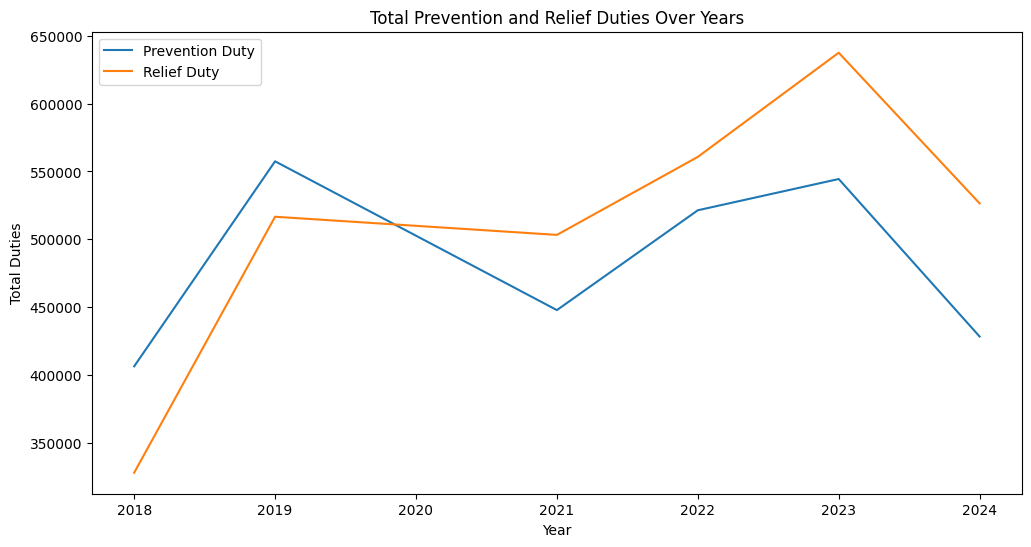

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total owed a prevention duty1', data=grouped_data_year, label='Prevention Duty')
sns.lineplot(x='Year', y='Total owed a relief duty1', data=grouped_data_year, label='Relief Duty')
plt.title('Total Prevention and Relief Duties Over Years')
plt.xlabel('Year')
plt.ylabel('Total Duties')
plt.legend()
plt.show()

In [ ]:

grouped_data_quarter = df2.groupby(['Year', 'Quarter'])[['Total owed a prevention duty1', 'Total owed a relief duty1']].sum().reset_index()


grouped_data_quarter['Total Prevention and Relief Duties'] = grouped_data_quarter['Total owed a prevention duty1'] + grouped_data_quarter['Total owed a relief duty1']

<ipython-input-23-96491ef827e3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Quarter', y='Total Prevention and Relief Duties', data=grouped_data_quarter, color='red',ci=None)


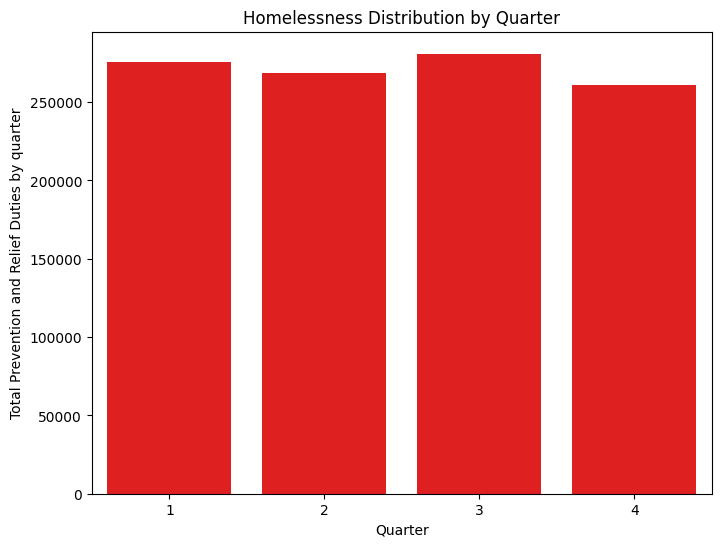

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Quarter', y='Total Prevention and Relief Duties', data=grouped_data_quarter, color='red',ci=None)
plt.title('Homelessness Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Prevention and Relief Duties by quarter')
plt.show()

In [ ]:
average_relief = df2["Total owed a relief duty1"].mean()
print(f"The average number of people receiving relief is:  {int(average_relief)}")

The average number of people receiving relief is:  433


In [ ]:
average_prevention = df2["Total owed a prevention duty1"].mean()
print(f"The average number of people affected by prevention is:  {int(average_prevention)}")

The average number of people affected by prevention is:  409


In [ ]:
location_relief = df.groupby("Location")["Total owed a relief duty1"].sum().reset_index()

exclude_locations = ["ENGLAND", "Rest of England", "North West", "South East", "West Midlands", "East of England", "South West", "East Midlands", "North East"]
filtered_locations = location_relief[~location_relief["Location"].isin(exclude_locations)]

top_5_distinct_locations = filtered_locations.sort_values(by=["Total owed a relief duty1"], ascending=False)["Location"].head(5).tolist()

print(f"Top 5 distinct locations with the highest total relief: {top_5_distinct_locations}")

Top 5 distinct locations with the highest total relief: ['London', 'Yorkshire and The Humber', 'Birmingham', 'Manchester', 'Sheffield']


In [ ]:
location_relief = df.groupby("Location")["Total owed a relief duty1"].sum().reset_index()

exclude_locations = ["ENGLAND", "Rest of England", "North West", "South East", "West Midlands", "East of England", "South West", "East Midlands", "North East"]
filtered_locations = location_relief[~location_relief["Location"].isin(exclude_locations)]

bottom_5_distinct_locations = filtered_locations.sort_values(by=["Total owed a relief duty1"], ascending=True)["Location"].head(5).tolist()

print(f"Top 5 distinct locations with the highest total relief: {bottom_5_distinct_locations}")

Top 5 distinct locations with the highest total relief: ['West Somerset', 'Purbeck', 'North Northamptonshire ', 'SloughR', 'NorthamptonR']


<ipython-input-62-4b38c20378fc>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Ethnicity_percent_sort.index, x=Ethnicity_percent_sort.values, palette='viridis')


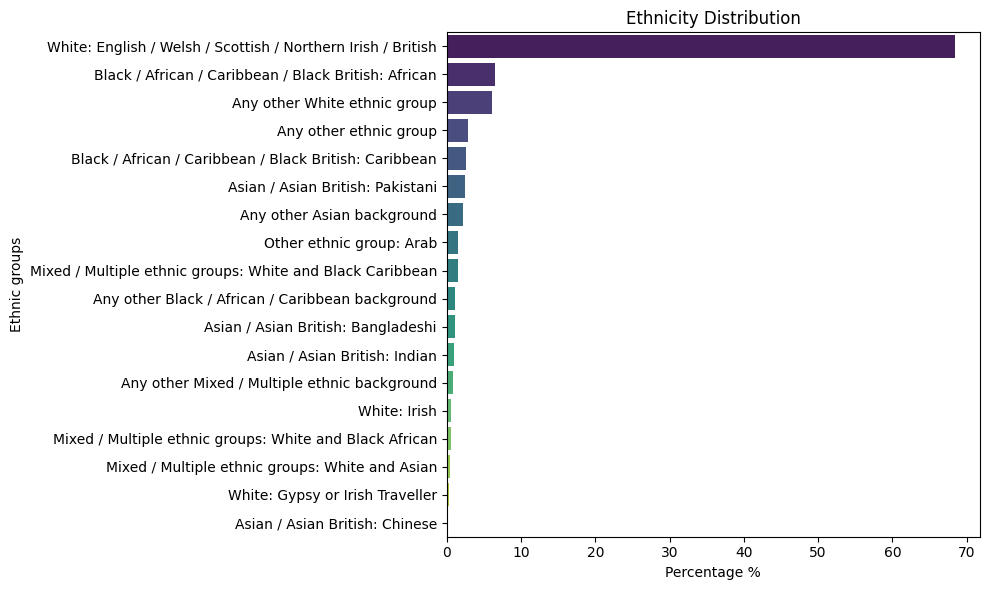

In [ ]:
Ethnicity = [ "White: English / Welsh / Scottish / Northern Irish / British",
    "White: Irish",
    "White: Gypsy or Irish Traveller",
    "Any other White ethnic group",
    "Black / African / Caribbean / Black British: African",
    "Black / African / Caribbean / Black British: Caribbean",
    "Any other Black / African / Caribbean background",
    "Asian / Asian British: Pakistani",
    "Asian / Asian British: Indian",
    "Asian / Asian British: Bangladeshi",
    "Asian / Asian British: Chinese",
    "Any other Asian background",
    "Mixed / Multiple ethnic groups: White and Black Caribbean",
    "Mixed / Multiple ethnic groups: White and Black African",
    "Mixed / Multiple ethnic groups: White and Asian",
    "Any other Mixed / Multiple ethnic background",
    "Other ethnic group: Arab",
    "Any other ethnic group"]

Ethnicity_count = df2[Ethnicity].sum()
Ethnicity_percent = (Ethnicity_count / Ethnicity_count.sum() * 100).round(2)
Ethnicity_percent_sort = Ethnicity_percent.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y=Ethnicity_percent_sort.index, x=Ethnicity_percent_sort.values, palette='viridis')
plt.title('Ethnicity Distribution')
plt.xlabel('Percentage %')
plt.ylabel('Ethnic groups')
plt.tight_layout()
plt.show()

#df2[ethnic_totals].corrwith(df2['Total owed a relief duty1']).plot(kind='bar', color='yellow', title='Relief duty vs Ethnicity')


<ipython-input-71-95d9329c2cef>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Support_percent_sort.index, x=Support_percent_sort.values, palette='flare')


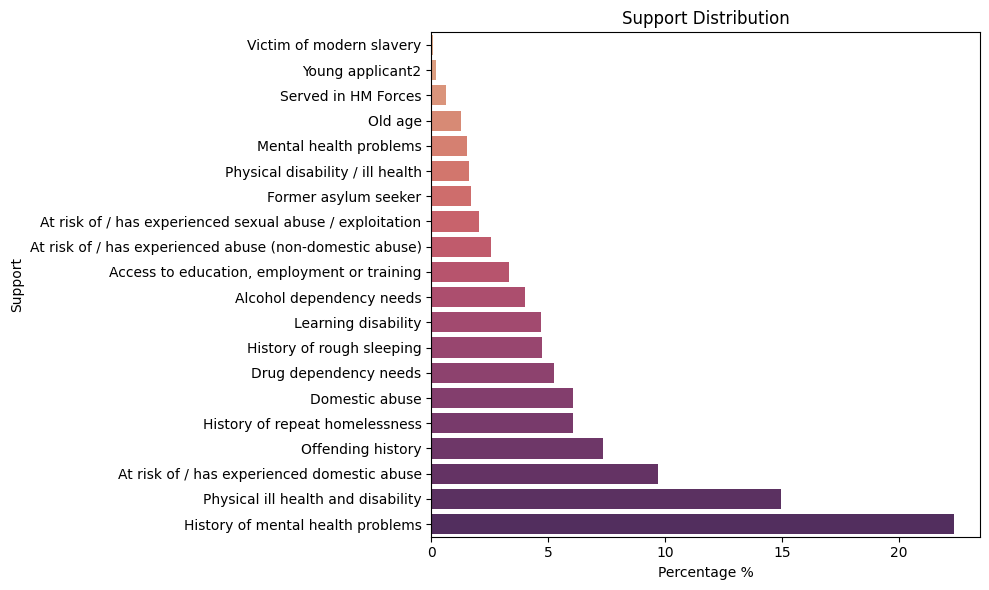

In [ ]:
Support = [ "Physical disability / ill health",
    "Mental health problems",
    "Young applicant2",
    "Domestic abuse",
    "Physical ill health and disability",
    "History of mental health problems",
    "Learning disability",
    "At risk of / has experienced sexual abuse / exploitation",
    "At risk of / has experienced domestic abuse",
    "At risk of / has experienced abuse (non-domestic abuse)",
    "Drug dependency needs",
    "Alcohol dependency needs",
    "Offending history",
    "History of repeat homelessness",
    "History of rough sleeping",
    "Former asylum seeker",
    "Old age",
    "Served in HM Forces",
    "Access to education, employment or training",
    "Victim of modern slavery"]

Support_count = df2[Support].sum()
Support_percent = (Support_count / Support_count.sum() * 100).round(2)
Support_percent_sort = Support_percent.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(y=Support_percent_sort.index, x=Support_percent_sort.values, palette='flare')
plt.title('Support Distribution')
plt.xlabel('Percentage %')
plt.ylabel('Support')
plt.tight_layout()
plt.show()




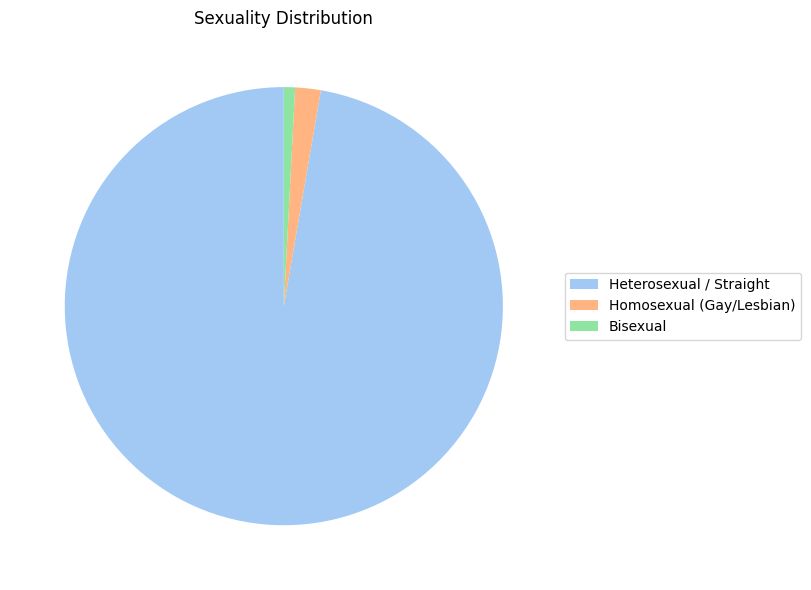

In [ ]:

Sexuality =df2[["Heterosexual / Straight","Homosexual (Gay/Lesbian)","Bisexual"]].sum()


plt.figure(figsize=(8, 6))
plt.pie(Sexuality, labels=None, colors=sns.color_palette('pastel'), startangle=90)
plt.legend( Sexuality.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Sexuality Distribution')
plt.tight_layout()
plt.show()


In [ ]:
Sexuality_percent = (Sexuality /Sexuality.sum() * 100).round(2)
for Sexuality_group, percent in Sexuality_percent.items():
    print(f"{Sexuality_group}: {percent}%")

Heterosexual / Straight: 97.29%
Homosexual (Gay/Lesbian): 1.88%
Bisexual: 0.82%


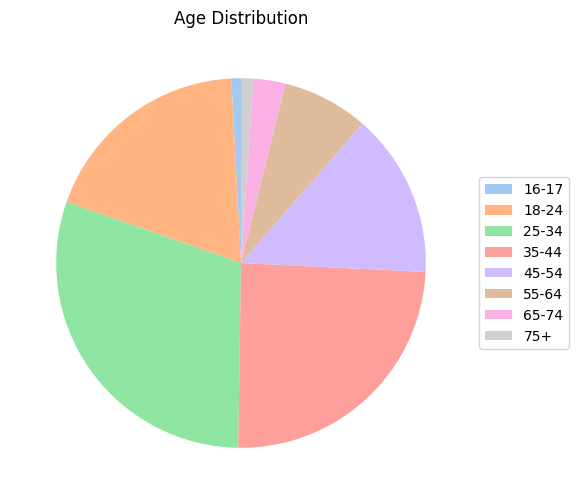

In [ ]:
Age =df2[["16-17",
    "18-24",
    "25-34",
    "35-44",
    "45-54"	,
    "55-64"	,
    "65-74"	,
    "75+"]].sum()
#Age_count = df2[Age].sum()

plt.figure(figsize=(8, 6))
plt.pie(Age, labels=None, colors=sns.color_palette('pastel'), startangle=90)
plt.legend( Age.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Age Distribution')
#plt.tight_layout()
plt.show()

In [ ]:
#age = df['Age'].value_counts()
Age_percent = (Age /Age.sum() * 100).round(2)
for age_group, percent in Age_percent.items():
    print(f"{age_group}: {percent}%")


16-17: 0.83%
18-24: 18.81%
25-34: 30.12%
35-44: 24.47%
45-54: 14.35%
55-64: 7.54%
65-74: 2.8%
75+: 1.07%


<ipython-input-58-b59c26a8c8c7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Family_percent_sort.index, x=Family_percent_sort.values, palette='Paired')


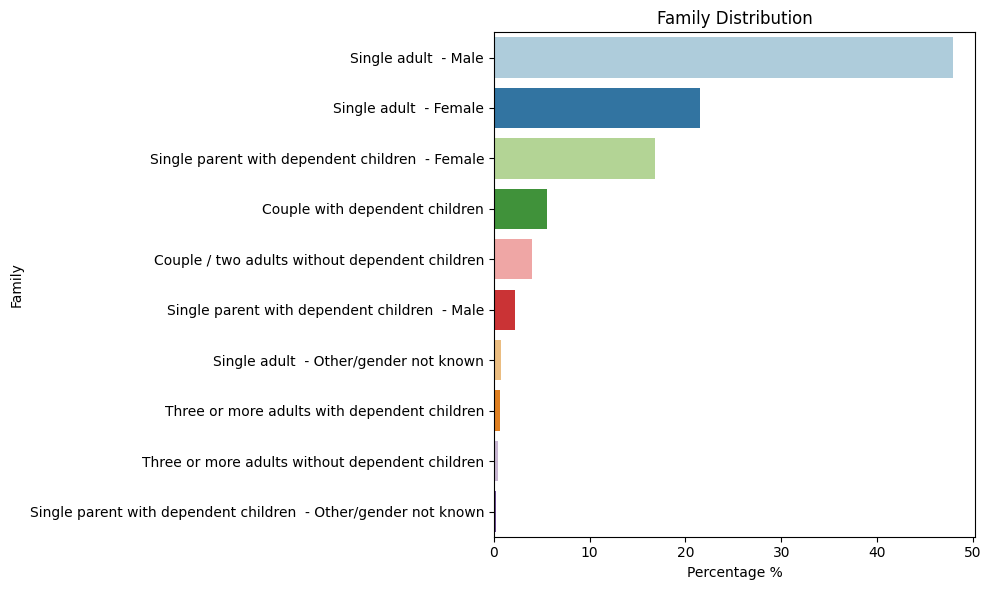

In [ ]:
Family = ["Single parent with dependent children  - Male",
    "Single parent with dependent children  - Female",
    "Single parent with dependent children  - Other/gender not known",
    "Single adult  - Male",
    "Single adult  - Female"	,
    "Single adult  - Other/gender not known",
    "Couple with dependent children",
    "Couple / two adults without dependent children",
    "Three or more adults with dependent children",
    "Three or more adults without dependent children"]

Family_count = df2[Family].sum()
Family_percent = (Family_count / Family_count.sum() * 100).round(2)
Family_percent_sort = Family_percent.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y=Family_percent_sort.index, x=Family_percent_sort.values, palette='Paired')
plt.title('Family Distribution')
plt.xlabel('Percentage %')
plt.ylabel('Family')
plt.tight_layout()
plt.show()




<ipython-input-72-e18bee0b3a5f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Economic_percent_sort.index, x=Economic_percent_sort.values, palette='cubehelix')


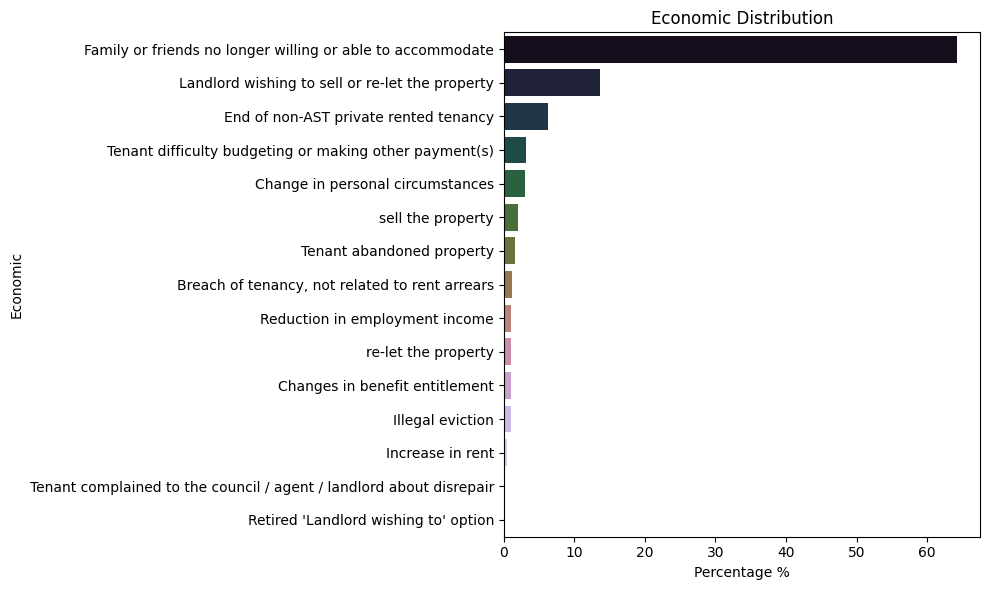

In [ ]:
Economic= [ "Tenant difficulty budgeting or making other payment(s)",
    "Increase in rent",
    "Reduction in employment income",
    "Changes in benefit entitlement",
    "Change in personal circumstances",
    "Breach of tenancy, not related to rent arrears",
    "Landlord wishing to sell or re-let the property",
    "sell the property",
    "re-let the property",
    "Retired 'Landlord wishing to' option",
    "Tenant complained to the council / agent / landlord about disrepair",
    "Illegal eviction",
    "Tenant abandoned property",
    "End of non-AST private rented tenancy",
    "Family or friends no longer willing or able to accommodate"]

Economic_count = df2[Economic].sum()
Economic_percent = (Economic_count / Economic_count.sum() * 100).round(2)
Economic_percent_sort = Economic_percent.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y=Economic_percent_sort.index, x=Economic_percent_sort.values, palette='cubehelix')
plt.title('Economic Distribution')
plt.xlabel('Percentage %')
plt.ylabel('Economic')
plt.tight_layout()
plt.show()




<ipython-input-57-0062924a39ec>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Employment_percent_sort.index, x=Employment_percent_sort.values, palette='Set2')


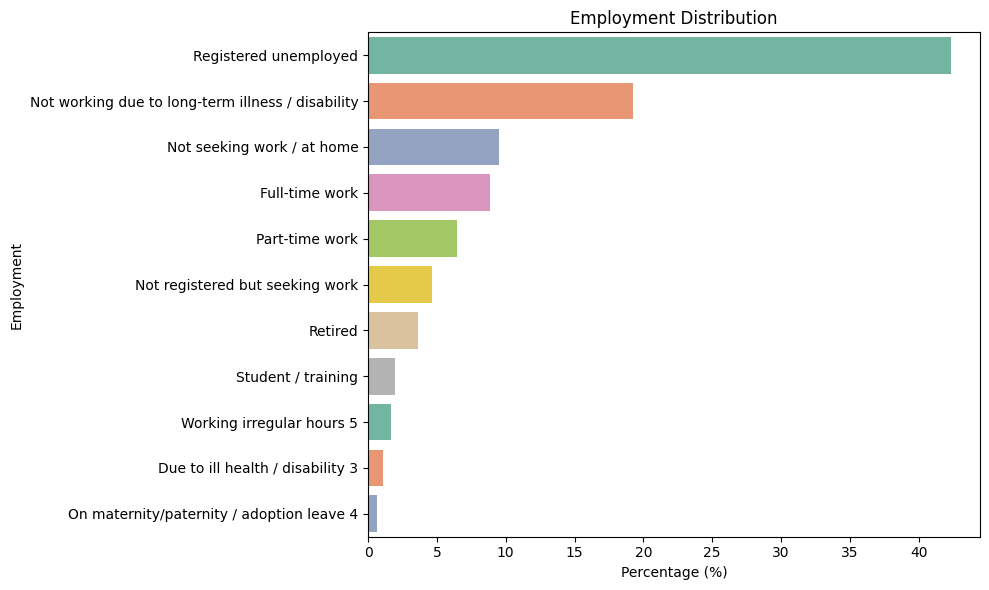

In [ ]:
Employment =["Full-time work",
    "Part-time work",
    "Student / training",
    "Registered unemployed",
    "Not registered but seeking work",
    "Not seeking work / at home",
    "Not working due to long-term illness / disability",
    "Retired",
    "Due to ill health / disability 3",
    "On maternity/paternity / adoption leave 4",
    "Working irregular hours 5"]


Employment_count = df2[Employment].sum()
Employment_percent = (Employment_count / Employment_count.sum() * 100).round(2)
Employment_percent_sort = Employment_percent.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y=Employment_percent_sort.index, x=Employment_percent_sort.values, palette='Set2')
plt.title('Employment Distribution')
plt.xlabel('Percentage (%)')
plt.ylabel('Employment')
plt.tight_layout()
plt.show()


# Features

In [ ]:
df2= pd.read_excel('/content/drive/MyDrive/FYP Datasets/NEWCleaned_Homelessness.xlsx')
print(df2.head())

     Region Code            Location  \
0  Not Available     Rest of England   
1      E06000001          Hartlepool   
2      E06000002       Middlesbrough   
3      E06000003  Redcar & Cleveland   
4      E06000004    Stockton-on-Tees   

   Single parent with dependent children  - Male  \
0                                            820   
1                                              5   
2                                              1   
3                                              1   
4                                              3   

   Single parent with dependent children  - Female  \
0                                             5630   
1                                               12   
2                                               21   
3                                               23   
4                                                7   

   Single parent with dependent children  - Other/gender not known  \
0                                                 9

In [ ]:
df2.columns

Index(['Region Code', 'Location',
       'Single parent with dependent children  - Male',
       'Single parent with dependent children  - Female',
       'Single parent with dependent children  - Other/gender not known',
       'Single adult  - Male', 'Single adult  - Female',
       'Single adult  - Other/gender not known',
       'Couple with dependent children',
       'Couple / two adults without dependent children',
       'Three or more adults with dependent children',
       'Three or more adults without dependent children', 'Year', 'Quarter',
       'Total owed a prevention duty1', 'Total owed a relief duty1',
       'Total owed a prevention or relief duty1',
       'Total number of households where prevention duty ended1,2',
       'Total number of households where relief duty ended1,2', '16-17',
       '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+',
       'White: English / Welsh / Scottish / Northern Irish / British',
       'White: Irish', 'White: Gypsy or Iri

In [ ]:
#df2 = df2[~df2['Location'].isin(['ENGLAND','Rest of England'])]
df2 = df2[~df2['Location'].isin(["ENGLAND", "Rest of England", "North West", "South East", "West Midlands", "East of England", "South West", "East Midlands", "North East"])]

In [ ]:

df2.drop(columns=["Region Code", "Location","Year","Quarter","Total owed a prevention duty1", "Total owed a prevention or relief duty1", "Total number of households where prevention duty ended1,2", "Total number of households where relief duty ended1,2", "Total Registered employed off work","Landlord wishing to sell or re-let the property","End of assured shorthold (AST) private rented tenancy, due to..", "Retired 'Landlord wishing to' option"], inplace=True)


In [ ]:
print(df2.head())

   Single parent with dependent children  - Male  \
1                                              5   
2                                              1   
3                                              1   
4                                              3   
5                                              1   

   Single parent with dependent children  - Female  \
1                                               12   
2                                               21   
3                                               23   
4                                                7   
5                                               17   

   Single parent with dependent children  - Other/gender not known  \
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 
5           

In [ ]:
#Get the vorrelation of values associatd with total owed a relief
correlation =df2.corr()['Total owed a relief duty1'].drop('Total owed a relief duty1')
correlation = correlation.sort_values(ascending=False)
Top_Feature = correlation.head(20).index.tolist()
print(Top_Feature)


['Single adult  - Female', 'Single adult  - Male', 'Single parent with dependent children  - Female', 'Couple / two adults without dependent children', 'Single parent with dependent children  - Male', 'Physical ill health and disability', 'Couple with dependent children', 'Family or friends no longer willing or able to accommodate', '35-44', 'Old age', '45-54', '25-34', '55-64', 'End of non-AST private rented tenancy', '65-74', 'Three or more adults without dependent children', '18-24', 'Any other White ethnic group', 'Registered unemployed', 'Mixed / Multiple ethnic groups: White and Black Caribbean']


In [ ]:
df2.columns

Index(['Single parent with dependent children  - Male',
       'Single parent with dependent children  - Female',
       'Single parent with dependent children  - Other/gender not known',
       'Single adult  - Male', 'Single adult  - Female',
       'Single adult  - Other/gender not known',
       'Couple with dependent children',
       'Couple / two adults without dependent children',
       'Three or more adults with dependent children',
       'Three or more adults without dependent children',
       'Total owed a relief duty1', '16-17', '18-24', '25-34', '35-44',
       '45-54', '55-64', '65-74', '75+',
       'White: English / Welsh / Scottish / Northern Irish / British',
       'White: Irish', 'White: Gypsy or Irish Traveller',
       'Any other White ethnic group',
       'Black / African / Caribbean / Black British: African',
       'Black / African / Caribbean / Black British: Caribbean',
       'Any other Black / African / Caribbean background',
       'Asian / Asian Briti

In [ ]:

df2_new=df2.dropna(subset=['Total owed a relief duty1']+Top_Feature)
X = df2_new[Top_Feature]
y = df2_new['Total owed a relief duty1']

# Tuning parameters

In [ ]:
RandomForest_model = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
params = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [10,20,30,None],
    'min_samples_leaf': [1, 2,4],
    'min_samples_split': [2, 5,10],
    'max_features': ['auto','sqrt', 'log2']
}

random_forest_gridSearch = GridSearchCV(estimator=RandomForest_model, param_grid=params, cv=3, n_jobs=-1, verbose=2)
random_forest_gridSearch.fit(X_train, y_train)

print(random_forest_gridSearch.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", 

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
xgboost_model = XGBRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
params = {
    'max_depth' : [3,5, 7,10],
    'learning_rate': [0.01,0.1, 0.3],
    'n_estimators': [ 100,200,300],
    'subsample': [0.6, 0.8, 1.0],
    'min_child_weight': [1,2,5],
}


xgb_gridSearch = GridSearchCV(estimator=xgboost_model, param_grid=params, cv=3, n_jobs=-1, verbose=2)
xgb_gridSearch.fit(X_train, y_train)

print(xgb_gridSearch.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
{'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
descision_tree_model = DecisionTreeRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
params = {
    'max_depth' : [5, 10, 15,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,6],
    'criterion' :['squared_error', 'absolute_error']}

decision_gridSearch = GridSearchCV(estimator=descision_tree_model, param_grid=params, cv=3, n_jobs=-1, verbose=2)
decision_gridSearch.fit(X_train, y_train)

print(decision_gridSearch.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
{'criterion': 'absolute_error', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
AdaBoost_model = AdaBoostRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
params = {
    'learning_rate': [0.01,0.1,0.3, 0.5,1.0],
    'n_estimators': [50, 100,200],
    'loss': ['linear', 'square', 'exponential'],
    'estimator': [DecisionTreeRegressor(max_depth=3)]
}


Ada_gridSearch = GridSearchCV(estimator=AdaBoost_model, param_grid=params, cv=3, n_jobs=-1, verbose=2)
Ada_gridSearch.fit(X_train, y_train)

print(Ada_gridSearch.best_params_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
{'estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 200}


In [ ]:
#Find the best parameters
print("Randon Forest Best Parameters : ", random_forest_gridSearch.best_params_)
print("XGBoost Best Parameters : ", xgb_gridSearch.best_params_)
print("Decision Tree Best Parameters : ", decision_gridSearch.best_params_)
print("ADA Boosting Best Parameters : ", Ada_gridSearch.best_params_)


Randon Forest Best Parameters :  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
XGBoost Best Parameters :  {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.8}
Decision Tree Best Parameters :  {'criterion': 'absolute_error', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
ADA Boosting Best Parameters :  {'estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 200}


# Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#rf = RandomForestRegressor(n_estimators= 100, max_depth=20,max_features='log2',min_samples_leaf=1,min_samples_split=2,random_state=42)
rf = RandomForestRegressor(n_estimators= 100, max_depth=10,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,random_state=42)
#rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.4f}')
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")



MAE: 8.7328
Mean Squared Error (MSE): 985.6720
Root Mean Squared Error (RMSE): 31.3954
R-squared (R²): 0.9943


In [ ]:
#Feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Top 10 Contributing Factors (Random Forest):\n")
print(importances.head(20))


Top 10 Contributing Factors (Random Forest):

Single adult  - Female                                        0.150166
Single adult  - Male                                          0.137653
Single parent with dependent children  - Female               0.128434
Physical ill health and disability                            0.120078
Old age                                                       0.083588
Family or friends no longer willing or able to accommodate    0.081979
Couple / two adults without dependent children                0.058502
Couple with dependent children                                0.056414
Single parent with dependent children  - Male                 0.050817
End of non-AST private rented tenancy                         0.027787
Three or more adults without dependent children               0.023913
35-44                                                         0.023050
Mixed / Multiple ethnic groups: White and Black Caribbean     0.013606
25-34                          

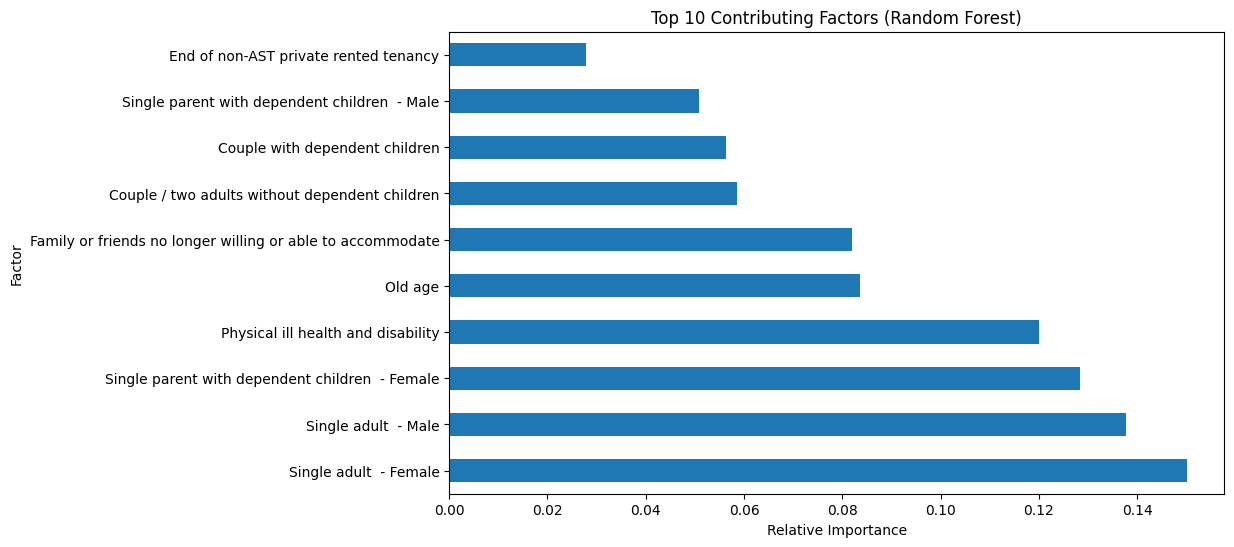

In [ ]:
top_10_rf = importances.head(10)
plt.figure(figsize=(10, 6))
top_10_rf.plot(kind='barh', title='Top 10 Contributing Factors (Random Forest)')
plt.xlabel('Relative Importance')
plt.ylabel('Factor')
plt.show()


#XGBoost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgboost_model = XGBRegressor(learning_rate= 0.1, max_depth=5,n_estimators = 200,subsample=0.8,min_child_weight=2,random_state=42)
#xgboost_model= XGBRegressor(n_estimators=100, random_state=42)
xgboost_model.fit(X_train, y_train)

y_pred = xgboost_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae:.4f}')
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

MAE: 6.9149
Mean Squared Error (MSE): 3225.5229
Root Mean Squared Error (RMSE): 56.7937
R-squared (R²): 0.9813


In [ ]:
#Feature importances
xgbimportances = pd.Series(xgboost_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Top 10 Contributing Factors (XGBoost):\n")
print(xgbimportances.head(20))


Top 10 Contributing Factors (XGBoost):

Single adult  - Female                                        0.503454
Single parent with dependent children  - Male                 0.289498
Old age                                                       0.065753
Single adult  - Male                                          0.053386
Couple with dependent children                                0.028250
Couple / two adults without dependent children                0.022445
Single parent with dependent children  - Female               0.018053
Three or more adults without dependent children               0.007718
18-24                                                         0.004185
35-44                                                         0.002521
Mixed / Multiple ethnic groups: White and Black Caribbean     0.001624
25-34                                                         0.001137
45-54                                                         0.000500
Family or friends no longer willing o

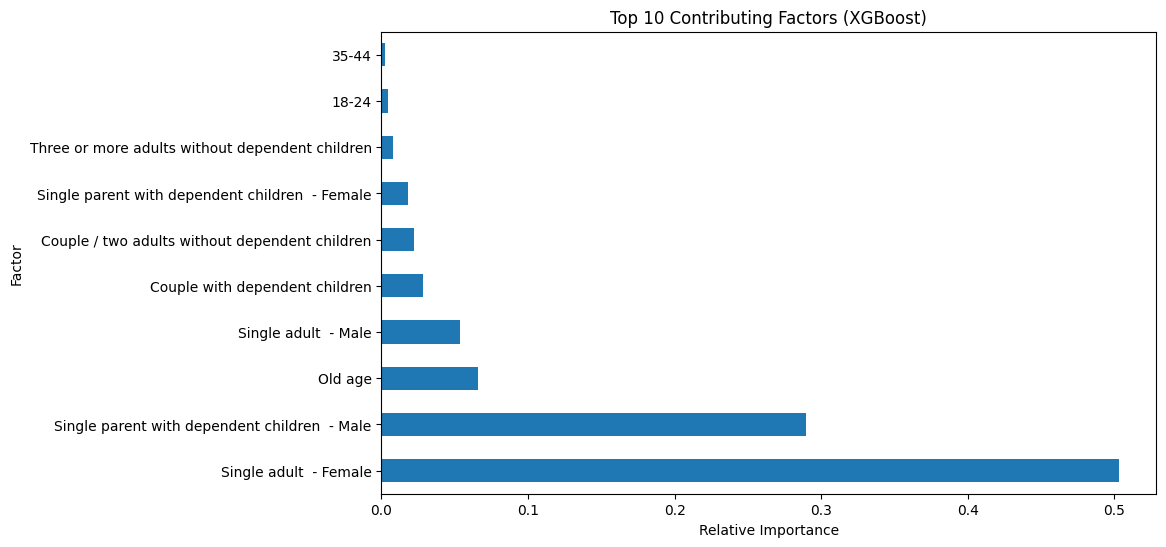

In [ ]:
top_10_xgb = xgbimportances.head(10)
plt.figure(figsize=(10, 6))
top_10_xgb.plot(kind='barh', title='Top 10 Contributing Factors (XGBoost)')
plt.xlabel('Relative Importance')
plt.ylabel('Factor')
plt.show()

# Decsion trees

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Decision_model = DecisionTreeRegressor(criterion="absolute_error",min_samples_split=2, max_depth=10,min_samples_leaf=1,random_state=42)
Decision_model = DecisionTreeRegressor(criterion="absolute_error",min_samples_split=2, max_depth=10,min_samples_leaf=1,random_state=42)
Decision_model.fit(X_train, y_train)

y_pred = Decision_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae:.4f}')
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

MAE: 11.1842
Mean Squared Error (MSE): 1729.4532
Root Mean Squared Error (RMSE): 41.5867
R-squared (R²): 0.9900


# ADA Boost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#AdaBoost_model = AdaBoostRegressor(loss='linear',learning_rate=0.1, n_estimators = 50,random_state=42)
AdaBoost_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),loss='linear',learning_rate=0.1, n_estimators = 200,random_state=42)
AdaBoost_model.fit(X_train, y_train)

y_pred = AdaBoost_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae:.4f}')
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

MAE: 45.4751
Mean Squared Error (MSE): 4407.2126
Root Mean Squared Error (RMSE): 66.3868
R-squared (R²): 0.9745


# Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Linear_model = LinearRegression()#(loss='linear',learning_rate=0.1, n_estimators = 50,random_state=42)
Linear_model.fit(X_train, y_train)

y_pred = Linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.4f}')
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

MAE: 3.1813
Mean Squared Error (MSE): 462.6308
Root Mean Squared Error (RMSE): 21.5089
R-squared (R²): 0.9973


# Comparison of models

In [ ]:
Comparison = {
    'Model': ['Random Frorest', 'XGBoost', 'Decision Trees', 'ADABoost', 'Linear Regression'],
    'MAE': ['8.7328','6.9149','11.1842','45.4751','3.1813'],
    'MSE': ['985.6720','3225.5229','1729.4532','4407.2126','462.6308'],
    'RMSE': ['31.3954','56.7937','41.5867','66.3868','21.5089'],
    'R²' : ['0.9943','0.9813','0.9900','0.9745','0.9973']
}

Comparison_results = pd.DataFrame(Comparison)
print(Comparison_results)






               Model      MAE        MSE     RMSE      R²
0     Random Frorest   8.7328   985.6720  31.3954  0.9943
1            XGBoost   6.9149  3225.5229  56.7937  0.9813
2     Decision Trees  11.1842  1729.4532  41.5867  0.9900
3           ADABoost  45.4751  4407.2126  66.3868  0.9745
4  Linear Regression   3.1813   462.6308  21.5089  0.9973


# Best model

In [ ]:
X = df2_new[Top_Feature]
y = df2_new['Total owed a relief duty1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)

LinearRegression()

PermutationExplainer explainer: 1380it [00:41, 26.83it/s]                          


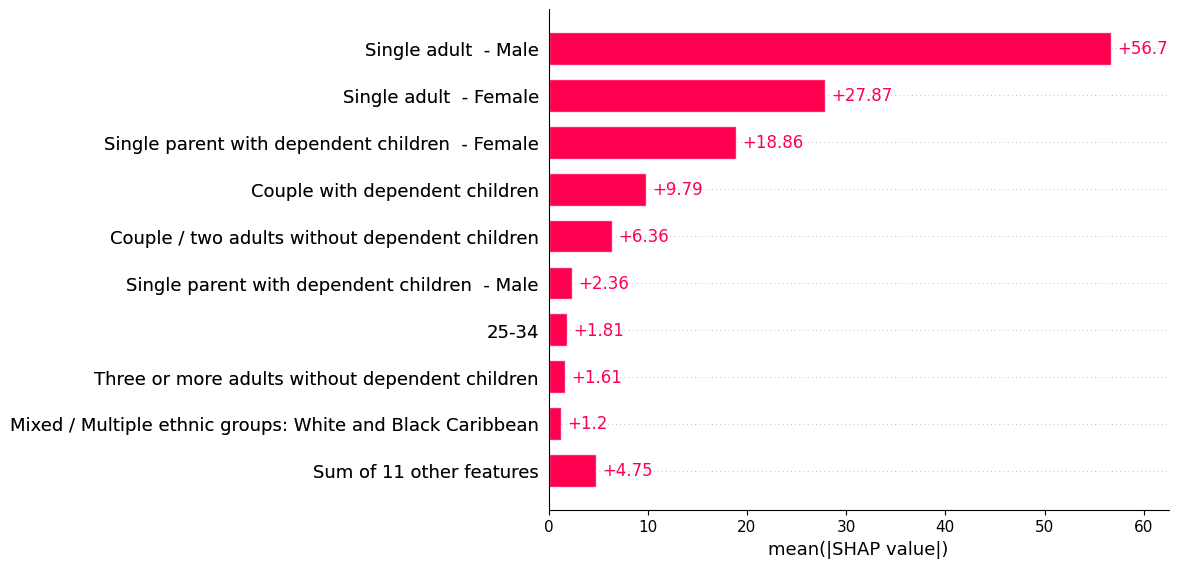

In [ ]:
explainer=shap.Explainer(Linear_model.predict, X_train)
shap_values = explainer(X_test)
shap.plots.bar(shap_values)